In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install missingno
%pip install scikit-learn

In [505]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn  
# Chemin vers le dossier CSV
csv_folder = 'CSV'


## Visualisation des premières lignes des fichiers CSV

### 1. EdStatsCountry-Series.csv


In [506]:
df_country_series = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry-Series.csv'))
print(f"Nombre de lignes: {len(df_country_series)}")
print(f"Nombre de colonnes: {len(df_country_series.columns)}")
print(f"\nColonnes: {list(df_country_series.columns)}")
df_country_series.head()


Nombre de lignes: 613
Nombre de colonnes: 4

Colonnes: ['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


---

## Analyse détaillée de EdStatsCountry-Series.csv

### 1. Définition d'une ligne
Une ligne représente une **combinaison d'un pays (CountryCode) et d'un indicateur (SeriesCode)** avec une description de la source de données.


In [507]:
# Recharger le fichier pour l'analyse
df_country_series = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry-Series.csv'))

# Nombre de lignes et colonnes
print("=" * 60)
print("ANALYSE DE EdStatsCountry-Series.csv")
print("=" * 60)
print(f"\n1. Dimensions du DataFrame:")
print(f"   Nombre de lignes: {df_country_series.shape[0]}")
print(f"   Nombre de colonnes: {df_country_series.shape[1]}")
print(f"   Colonnes: {list(df_country_series.columns)}")


ANALYSE DE EdStatsCountry-Series.csv

1. Dimensions du DataFrame:
   Nombre de lignes: 613
   Nombre de colonnes: 4
   Colonnes: ['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']


In [508]:
# Inspection initiale
print("\n2. Informations générales:")
df_country_series.info()
print("\nAperçu des données:")
df_country_series.head(10)



2. Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB

Aperçu des données:


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [509]:
# Nombre de doublons
print("\n3. Analyse des doublons:")
nb_doublons = df_country_series.duplicated().sum()
print(f"   Nombre de lignes dupliquées: {nb_doublons}")

if nb_doublons > 0:
    print(f"   Proportion de doublons: {nb_doublons/len(df_country_series)*100:.2f}%")
    print("\n   Exemples de doublons:")
    print(df_country_series[df_country_series.duplicated(keep=False)].head(10))
else:
    print("   Aucun doublon détecté.")



3. Analyse des doublons:
   Nombre de lignes dupliquées: 0
   Aucun doublon détecté.


In [510]:
# Suppression des doublons si nécessaire
if nb_doublons > 0:
    print("\n4. Suppression des doublons:")
    df_country_series = df_country_series.drop_duplicates()
    print(f"   Nombre de lignes après suppression: {df_country_series.shape[0]}")
else:
    print("\n4. Pas de suppression nécessaire (aucun doublon)")



4. Pas de suppression nécessaire (aucun doublon)


In [511]:
# Proportion de valeurs manquantes par colonne
print("\n5. Proportion de valeurs manquantes par colonne:")
missing_prop = df_country_series.isnull().sum() / len(df_country_series) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_prop.index,
    'Valeurs manquantes': df_country_series.isnull().sum(),
    'Proportion (%)': missing_prop.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Proportion (%)', ascending=False)
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("   Aucune valeur manquante détectée.")



5. Proportion de valeurs manquantes par colonne:
   Colonne  Valeurs manquantes  Proportion (%)
Unnamed: 3                 613           100.0


In [512]:
# Suppression des colonnes inutilisables (colonnes vides ou avec uniquement des valeurs manquantes)
print("\n6. Suppression des colonnes inutilisables:")
colonnes_avant = df_country_series.columns.tolist()

# Colonnes avec 100% de valeurs manquantes
colonnes_vides = df_country_series.columns[df_country_series.isnull().all()].tolist()

# Colonnes "Unnamed" qui sont souvent vides
colonnes_unnamed = [col for col in df_country_series.columns if 'Unnamed' in col and df_country_series[col].isnull().all()]

colonnes_a_supprimer = list(set(colonnes_vides + colonnes_unnamed))

if colonnes_a_supprimer:
    print(f"   Colonnes à supprimer: {colonnes_a_supprimer}")
    df_country_series = df_country_series.drop(columns=colonnes_a_supprimer)
    print(f"   Colonnes supprimées. Colonnes restantes: {list(df_country_series.columns)}")
else:
    print("   Aucune colonne inutilisable détectée.")



6. Suppression des colonnes inutilisables:
   Colonnes à supprimer: ['Unnamed: 3']
   Colonnes supprimées. Colonnes restantes: ['CountryCode', 'SeriesCode', 'DESCRIPTION']


In [513]:
# Identification des colonnes numériques et catégorielles
print("\n7. Analyse des colonnes numériques:")
colonnes_numeriques = df_country_series.select_dtypes(include=['int64', 'float64']).columns.tolist()
if colonnes_numeriques:
    print(f"   Colonnes numériques: {colonnes_numeriques}")
    print("\n   Statistiques descriptives:")
    print(df_country_series[colonnes_numeriques].describe())
else:
    print("   Aucune colonne numérique détectée.")



7. Analyse des colonnes numériques:
   Aucune colonne numérique détectée.


In [514]:
# Analyse des colonnes catégorielles
print("\n8. Analyse des colonnes catégorielles:")
colonnes_categorielles = df_country_series.select_dtypes(include=['object']).columns.tolist()
print(f"   Colonnes catégorielles: {colonnes_categorielles}")

for col in colonnes_categorielles:
    print(f"\n   {col}:")
    print(f"   Nombre de valeurs uniques: {df_country_series[col].nunique()}")
    print(f"   Nombre d'occurrences de chaque valeur (top 10):")
    print(df_country_series[col].value_counts().head(10).to_string())



8. Analyse des colonnes catégorielles:
   Colonnes catégorielles: ['CountryCode', 'SeriesCode', 'DESCRIPTION']

   CountryCode:
   Nombre de valeurs uniques: 211
   Nombre d'occurrences de chaque valeur (top 10):
CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
MAR    12
TZA    12
GUY     8
ERI     8
ARG     8

   SeriesCode:
   Nombre de valeurs uniques: 21
   Nombre d'occurrences de chaque valeur (top 10):
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13

   DESCRIPTION:
   Nombre de valeurs uniques: 97
   Nombre d'occurrences de chaque valeur (top 10):
DESCRIPTION
Data sources : United Nations World Population Prospects                                       154
Data sources: United Nations World Population Prospects                                        137
Es

---

## Analyse détaillée de EdStatsCountry.csv

### 1. Définition d'une ligne
Une ligne représente **un pays** avec toutes ses caractéristiques (code pays, nom, région, groupe de revenu, etc.).


In [515]:
# Recharger le fichier pour l'analyse
df_country = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry.csv'))

# Nombre de lignes et colonnes
print("=" * 60)
print("ANALYSE DE EdStatsCountry.csv")
print("=" * 60)
print(f"\n1. Dimensions du DataFrame:")
print(f"   Nombre de lignes: {df_country.shape[0]}")
print(f"   Nombre de colonnes: {df_country.shape[1]}")
print(f"   Colonnes: {list(df_country.columns)}")


ANALYSE DE EdStatsCountry.csv

1. Dimensions du DataFrame:
   Nombre de lignes: 241
   Nombre de colonnes: 32
   Colonnes: ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31']


In [516]:
# Inspection initiale
print("\n2. Informations générales:")
df_country.info()
print("\nAperçu des données:")
df_country.head()



2. Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-nul

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [517]:
# Nombre de doublons
print("\n3. Analyse des doublons:")
nb_doublons = df_country.duplicated().sum()
print(f"   Nombre de lignes dupliquées: {nb_doublons}")

# Vérifier les doublons sur la clé primaire logique (Country Code)
doublons_code = df_country['Country Code'].duplicated().sum()
print(f"   Nombre de codes pays dupliqués: {doublons_code}")

if nb_doublons > 0:
    print(f"   Proportion de doublons: {nb_doublons/len(df_country)*100:.2f}%")
    print("\n   Exemples de doublons:")
    print(df_country[df_country.duplicated(keep=False)].head(10))
else:
    print("   Aucun doublon détecté.")



3. Analyse des doublons:
   Nombre de lignes dupliquées: 0
   Nombre de codes pays dupliqués: 0
   Aucun doublon détecté.


In [518]:
# Suppression des doublons si nécessaire
if nb_doublons > 0:
    print("\n4. Suppression des doublons:")
    df_country = df_country.drop_duplicates()
    print(f"   Nombre de lignes après suppression: {df_country.shape[0]}")
else:
    print("\n4. Pas de suppression nécessaire (aucun doublon)")



4. Pas de suppression nécessaire (aucun doublon)


In [519]:
# Proportion de valeurs manquantes par colonne
print("\n5. Proportion de valeurs manquantes par colonne:")
missing_prop = df_country.isnull().sum() / len(df_country) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_prop.index,
    'Valeurs manquantes': df_country.isnull().sum(),
    'Proportion (%)': missing_prop.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Proportion (%)', ascending=False)
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("   Aucune valeur manquante détectée.")



5. Proportion de valeurs manquantes par colonne:
                                          Colonne  Valeurs manquantes  Proportion (%)
                                      Unnamed: 31                 241      100.000000
                 National accounts reference year                 209       86.721992
                    Alternative conversion factor                 194       80.497925
                                     Other groups                 183       75.933610
                           Latest industrial data                 134       55.601660
                      Vital registration complete                 130       53.941909
                   External debt Reporting status                 117       48.547718
                          Latest household survey                 100       41.493776
                       Latest agricultural census                  99       41.078838
                                 Lending category                  97       40.248963
    

In [520]:
# Suppression des colonnes inutilisables
print("\n6. Suppression des colonnes inutilisables:")
colonnes_avant = df_country.columns.tolist()

# Colonnes avec 100% de valeurs manquantes
colonnes_vides = df_country.columns[df_country.isnull().all()].tolist()

# Colonnes "Unnamed" qui sont souvent vides
colonnes_unnamed = [col for col in df_country.columns if 'Unnamed' in col and df_country[col].isnull().all()]

colonnes_a_supprimer = list(set(colonnes_vides + colonnes_unnamed))

if colonnes_a_supprimer:
    print(f"   Colonnes à supprimer: {colonnes_a_supprimer}")
    df_country = df_country.drop(columns=colonnes_a_supprimer)
    print(f"   Colonnes supprimées. Colonnes restantes: {list(df_country.columns)}")
else:
    print("   Aucune colonne inutilisable détectée.")



6. Suppression des colonnes inutilisables:
   Colonnes à supprimer: ['Unnamed: 31']
   Colonnes supprimées. Colonnes restantes: ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data']


In [521]:
# Identification des colonnes numériques et catégorielles
print("\n7. Analyse des colonnes numériques:")
colonnes_numeriques = df_country.select_dtypes(include=['int64', 'float64']).columns.tolist()
if colonnes_numeriques:
    print(f"   Colonnes numériques: {colonnes_numeriques}")
    print("\n   Statistiques descriptives:")
    print(df_country[colonnes_numeriques].describe())
else:
    print("   Aucune colonne numérique détectée.")



7. Analyse des colonnes numériques:
   Colonnes numériques: ['National accounts reference year', 'Latest industrial data', 'Latest trade data']

   Statistiques descriptives:
       National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000             2009.000000   
75%                          2005.00000             2010.000000   
max                          2012.00000             2010.000000   

       Latest trade data  
count         185.000000  
mean         2010.994595  
std             2.569675  
min          1995.000000  
25%          2011.000000  
50%          2012.000000  
75%          2012.000000  
max 

In [522]:
# Analyse des colonnes catégorielles
print("\n8. Analyse des colonnes catégorielles:")
colonnes_categorielles = df_country.select_dtypes(include=['object']).columns.tolist()
print(f"   Colonnes catégorielles: {colonnes_categorielles}")

for col in colonnes_categorielles:
    print(f"\n   {col}:")
    print(f"   Nombre de valeurs uniques: {df_country[col].nunique()}")
    if df_country[col].nunique() <= 50:  # Afficher toutes les valeurs si peu nombreuses
        print(f"   Nombre d'occurrences de chaque valeur:")
        print(df_country[col].value_counts().to_string())
    else:  # Sinon afficher les top 10
        print(f"   Nombre d'occurrences de chaque valeur (top 10):")
        print(df_country[col].value_counts().head(10).to_string())



8. Analyse des colonnes catégorielles:
   Colonnes catégorielles: ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest water withdrawal data']

   Country Code:
   Nombre de valeurs uniques: 241
   Nombre d'occurrences de chaque valeur (top 10):
Country Code
ABW    1
AFG    1
AGO    1
ALB    1
AND    1
ARB    1
ARE    1
ARG    1
ARM    1
ASM    1

   Short Name:
   Nombre de valeurs uniques: 24

---

## Analyse détaillée de EdStatsData.csv

### 1. Définition d'une ligne
Une ligne représente **une combinaison d'un pays (Country Code) et d'un indicateur (Indicator Code)** avec les valeurs de cet indicateur pour différentes années (1970-2100).


In [523]:
# Recharger le fichier pour l'analyse
print("=" * 60)
print("ANALYSE DE EdStatsData.csv")
print("=" * 60)
print("Chargement du fichier (peut prendre du temps - fichier volumineux)...")
df_data = pd.read_csv(os.path.join(csv_folder, 'EdStatsData.csv'))

# Nombre de lignes et colonnes
print(f"\n1. Dimensions du DataFrame:")
print(f"   Nombre de lignes: {df_data.shape[0]}")
print(f"   Nombre de colonnes: {df_data.shape[1]}")
print(f"   Colonnes: {list(df_data.columns[:10])}... (et {len(df_data.columns)-10} autres)")


ANALYSE DE EdStatsData.csv
Chargement du fichier (peut prendre du temps - fichier volumineux)...

1. Dimensions du DataFrame:
   Nombre de lignes: 886930
   Nombre de colonnes: 70
   Colonnes: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975']... (et 60 autres)


In [524]:
# Inspection initiale
print("\n2. Informations générales (échantillon):")
df_data.info()
print("\nAperçu des données:")
df_data.head()



2. Informations générales (échantillon):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982          

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [525]:
# Nombre de doublons
print("\n3. Analyse des doublons:")
nb_doublons = df_data.duplicated().sum()
print(f"   Nombre de lignes dupliquées: {nb_doublons}")

# Vérifier les doublons sur la clé primaire logique (Country Code + Indicator Code)
if 'Country Code' in df_data.columns and 'Indicator Code' in df_data.columns:
    doublons_cle = df_data.duplicated(subset=['Country Code', 'Indicator Code'], keep=False).sum()
    print(f"   Nombre de combinaisons Country Code + Indicator Code dupliquées: {doublons_cle}")

if nb_doublons > 0:
    print(f"   Proportion de doublons: {nb_doublons/len(df_data)*100:.2f}%")
    print("\n   Exemples de doublons (premiers):")
    print(df_data[df_data.duplicated(keep=False)].head(10))
else:
    print("   Aucun doublon détecté.")



3. Analyse des doublons:
   Nombre de lignes dupliquées: 0
   Nombre de combinaisons Country Code + Indicator Code dupliquées: 0
   Aucun doublon détecté.


In [526]:
# Suppression des doublons si nécessaire
if nb_doublons > 0:
    print("\n4. Suppression des doublons:")
    df_data = df_data.drop_duplicates()
    print(f"   Nombre de lignes après suppression: {df_data.shape[0]}")
else:
    print("\n4. Pas de suppression nécessaire (aucun doublon)")



4. Pas de suppression nécessaire (aucun doublon)


In [527]:
# Proportion de valeurs manquantes par colonne
print("\n5. Proportion de valeurs manquantes par colonne:")
missing_prop = df_data.isnull().sum() / len(df_data) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_prop.index,
    'Valeurs manquantes': df_data.isnull().sum(),
    'Proportion (%)': missing_prop.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Proportion (%)', ascending=False)
print(f"   Colonnes avec valeurs manquantes (top 20):")
print(missing_df.head(20).to_string(index=False))



5. Proportion de valeurs manquantes par colonne:
   Colonnes avec valeurs manquantes (top 20):
    Colonne  Valeurs manquantes  Proportion (%)
Unnamed: 69              886930      100.000000
       2017              886787       99.983877
       2016              870470       98.144160
       1971              851393       95.993258
       1973              851385       95.992356
       1972              851311       95.984012
       1974              851200       95.971497
       1979              850121       95.849842
       1976              849447       95.773849
       1982              849419       95.770692
       1989              849390       95.767422
       1977              849356       95.763589
       1978              849354       95.763364
       1983              848470       95.663694
       1988              848378       95.653321
       1984              848324       95.647233
       1987              848289       95.643286
       1981              848153       95

In [528]:
# Suppression des colonnes inutilisables
print("\n6. Suppression des colonnes inutilisables:")
colonnes_avant = df_data.columns.tolist()

# Colonnes avec 100% de valeurs manquantes
colonnes_vides = df_data.columns[df_data.isnull().all()].tolist()

# Colonnes "Unnamed" qui sont souvent vides
colonnes_unnamed = [col for col in df_data.columns if 'Unnamed' in col and df_data[col].isnull().all()]

colonnes_a_supprimer = list(set(colonnes_vides + colonnes_unnamed))

if colonnes_a_supprimer:
    print(f"   Colonnes à supprimer: {colonnes_a_supprimer}")
    df_data = df_data.drop(columns=colonnes_a_supprimer)
    print(f"   Colonnes supprimées. Nombre de colonnes restantes: {len(df_data.columns)}")
else:
    print("   Aucune colonne inutilisable détectée.")



6. Suppression des colonnes inutilisables:
   Colonnes à supprimer: ['Unnamed: 69']
   Colonnes supprimées. Nombre de colonnes restantes: 69


In [529]:
# Identification des colonnes numériques (années)
print("\n7. Analyse des colonnes numériques:")
# Les colonnes d'années sont numériques (1970, 1971, etc.)
colonnes_annees = [col for col in df_data.columns if col.isdigit()]

if colonnes_annees:
    print(f"   Nombre de colonnes d'années: {len(colonnes_annees)}")
    print(f"   Période: {min(colonnes_annees)} - {max(colonnes_annees)}")
    print("\n   Statistiques descriptives sur les colonnes d'années (échantillon de 5 années):")
    # Prendre un échantillon d'années pour les statistiques
    echantillon_annees = colonnes_annees[::len(colonnes_annees)//5][:5]
    print(df_data[echantillon_annees].describe())
else:
    print("   Aucune colonne numérique détectée.")



7. Analyse des colonnes numériques:
   Nombre de colonnes d'années: 65
   Période: 1970 - 2100

   Statistiques descriptives sur les colonnes d'années (échantillon de 5 années):
               1970          1983          1996          2009          2040
count  7.228800e+04  3.846000e+04  7.680700e+04  1.421080e+05  5.143600e+04
mean   1.974772e+09  7.856908e+09  1.874630e+10  1.894907e+10  6.751516e+02
std    1.211687e+11  2.823809e+11  5.812586e+11  7.623650e+11  1.874408e+04
min   -1.435564e+00 -2.867273e+00 -3.820174e+00 -4.561240e+05 -2.140000e+00
25%    8.900000e-01  9.581825e+00  4.836486e+01  1.181939e+01  5.000000e-02
50%    6.317724e+00  7.592528e+01  3.262400e+04  9.925039e+01  2.300000e-01
75%    6.251250e+01  6.304125e+04  4.371055e+05  1.180412e+05  7.400000e+00
max    1.903929e+13  2.916436e+13  5.478031e+13  8.677516e+13  2.330336e+06


In [530]:
# Analyse des colonnes catégorielles
print("\n8. Analyse des colonnes catégorielles:")
colonnes_categorielles = df_data.select_dtypes(include=['object']).columns.tolist()
print(f"   Colonnes catégorielles: {colonnes_categorielles}")

for col in colonnes_categorielles:
    print(f"\n   {col}:")
    print(f"   Nombre de valeurs uniques: {df_data[col].nunique()}")
    if df_data[col].nunique() <= 30:  # Afficher toutes les valeurs si peu nombreuses
        print(f"   Nombre d'occurrences de chaque valeur:")
        print(df_data[col].value_counts().to_string())
    else:  # Sinon afficher les top 10
        print(f"   Nombre d'occurrences de chaque valeur (top 10):")
        print(df_data[col].value_counts().head(10).to_string())



8. Analyse des colonnes catégorielles:
   Colonnes catégorielles: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

   Country Name:
   Nombre de valeurs uniques: 242
   Nombre d'occurrences de chaque valeur (top 10):
Country Name
Arab World                                       3665
East Asia & Pacific                              3665
East Asia & Pacific (excluding high income)      3665
Euro area                                        3665
Europe & Central Asia                            3665
Europe & Central Asia (excluding high income)    3665
European Union                                   3665
Heavily indebted poor countries (HIPC)           3665
High income                                      3665
Latin America & Caribbean                        3665

   Country Code:
   Nombre de valeurs uniques: 242
   Nombre d'occurrences de chaque valeur (top 10):
Country Code
ARB    3665
EAS    3665
EAP    3665
EMU    3665
ECS    3665
ECA    3665
EUU    3665
HPC    3

---

## Analyse détaillée de EdStatsFootNote.csv

### 1. Définition d'une ligne
Une ligne représente une **combinaison d'un pays (CountryCode), d'un indicateur (SeriesCode) et d'une année (Year)** avec une note descriptive.


In [531]:
# Recharger le fichier pour l'analyse
print("=" * 60)
print("ANALYSE DE EdStatsFootNote.csv")
print("=" * 60)
print("Chargement du fichier (peut prendre du temps - fichier volumineux)...")
df_footnote = pd.read_csv(os.path.join(csv_folder, 'EdStatsFootNote.csv'))

# Nombre de lignes et colonnes
print(f"\n1. Dimensions du DataFrame:")
print(f"   Nombre de lignes: {df_footnote.shape[0]}")
print(f"   Nombre de colonnes: {df_footnote.shape[1]}")
print(f"   Colonnes: {list(df_footnote.columns)}")


ANALYSE DE EdStatsFootNote.csv
Chargement du fichier (peut prendre du temps - fichier volumineux)...

1. Dimensions du DataFrame:
   Nombre de lignes: 643638
   Nombre de colonnes: 5
   Colonnes: ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']


In [532]:
# Inspection initiale
print("\n2. Informations générales:")
df_footnote.info()
print("\nAperçu des données:")
df_footnote.head(10)



2. Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB

Aperçu des données:


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [533]:
# Nombre de doublons
print("\n3. Analyse des doublons:")
nb_doublons = df_footnote.duplicated().sum()
print(f"   Nombre de lignes dupliquées: {nb_doublons}")

# Vérifier les doublons sur la clé primaire logique (CountryCode + SeriesCode + Year)
if all(col in df_footnote.columns for col in ['CountryCode', 'SeriesCode', 'Year']):
    doublons_cle = df_footnote.duplicated(subset=['CountryCode', 'SeriesCode', 'Year'], keep=False).sum()
    print(f"   Nombre de combinaisons CountryCode + SeriesCode + Year dupliquées: {doublons_cle}")

if nb_doublons > 0:
    print(f"   Proportion de doublons: {nb_doublons/len(df_footnote)*100:.2f}%")
    print("\n   Exemples de doublons (premiers):")
    print(df_footnote[df_footnote.duplicated(keep=False)].head(10))
else:
    print("   Aucun doublon détecté.")



3. Analyse des doublons:
   Nombre de lignes dupliquées: 0
   Nombre de combinaisons CountryCode + SeriesCode + Year dupliquées: 0
   Aucun doublon détecté.


In [534]:
# Suppression des doublons si nécessaire
if nb_doublons > 0:
    print("\n4. Suppression des doublons:")
    df_footnote = df_footnote.drop_duplicates()
    print(f"   Nombre de lignes après suppression: {df_footnote.shape[0]}")
else:
    print("\n4. Pas de suppression nécessaire (aucun doublon)")



4. Pas de suppression nécessaire (aucun doublon)


In [535]:
# Proportion de valeurs manquantes par colonne
print("\n5. Proportion de valeurs manquantes par colonne:")
missing_prop = df_footnote.isnull().sum() / len(df_footnote) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_prop.index,
    'Valeurs manquantes': df_footnote.isnull().sum(),
    'Proportion (%)': missing_prop.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Proportion (%)', ascending=False)
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("   Aucune valeur manquante détectée.")



5. Proportion de valeurs manquantes par colonne:
   Colonne  Valeurs manquantes  Proportion (%)
Unnamed: 4              643638           100.0


In [536]:
# Suppression des colonnes inutilisables
print("\n6. Suppression des colonnes inutilisables:")
colonnes_avant = df_footnote.columns.tolist()

# Colonnes avec 100% de valeurs manquantes
colonnes_vides = df_footnote.columns[df_footnote.isnull().all()].tolist()

# Colonnes "Unnamed" qui sont souvent vides
colonnes_unnamed = [col for col in df_footnote.columns if 'Unnamed' in col and df_footnote[col].isnull().all()]

colonnes_a_supprimer = list(set(colonnes_vides + colonnes_unnamed))

if colonnes_a_supprimer:
    print(f"   Colonnes à supprimer: {colonnes_a_supprimer}")
    df_footnote = df_footnote.drop(columns=colonnes_a_supprimer)
    print(f"   Colonnes supprimées. Colonnes restantes: {list(df_footnote.columns)}")
else:
    print("   Aucune colonne inutilisable détectée.")



6. Suppression des colonnes inutilisables:
   Colonnes à supprimer: ['Unnamed: 4']
   Colonnes supprimées. Colonnes restantes: ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION']


In [537]:
# Identification des colonnes numériques et catégorielles
print("\n7. Analyse des colonnes numériques:")
colonnes_numeriques = df_footnote.select_dtypes(include=['int64', 'float64']).columns.tolist()
if colonnes_numeriques:
    print(f"   Colonnes numériques: {colonnes_numeriques}")
    print("\n   Statistiques descriptives:")
    print(df_footnote[colonnes_numeriques].describe())
else:
    print("   Aucune colonne numérique détectée.")



7. Analyse des colonnes numériques:
   Aucune colonne numérique détectée.


In [538]:
# Analyse des colonnes catégorielles
print("\n8. Analyse des colonnes catégorielles:")
colonnes_categorielles = df_footnote.select_dtypes(include=['object']).columns.tolist()
print(f"   Colonnes catégorielles: {colonnes_categorielles}")

for col in colonnes_categorielles:
    print(f"\n   {col}:")
    print(f"   Nombre de valeurs uniques: {df_footnote[col].nunique()}")
    if df_footnote[col].nunique() <= 50:  # Afficher toutes les valeurs si peu nombreuses
        print(f"   Nombre d'occurrences de chaque valeur (top 20):")
        print(df_footnote[col].value_counts().head(20).to_string())
    else:  # Sinon afficher les top 10
        print(f"   Nombre d'occurrences de chaque valeur (top 10):")
        print(df_footnote[col].value_counts().head(10).to_string())



8. Analyse des colonnes catégorielles:
   Colonnes catégorielles: ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION']

   CountryCode:
   Nombre de valeurs uniques: 239
   Nombre d'occurrences de chaque valeur (top 10):
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
HPC    6237
LAC    6116
MIC    5862
LMY    5839
LCN    5779

   SeriesCode:
   Nombre de valeurs uniques: 1558
   Nombre d'occurrences de chaque valeur (top 10):
SeriesCode
SH.DYN.MORT          9226
SE.PRM.AGES          8771
SE.PRM.DURS          8771
SE.SEC.DURS          8619
SE.SEC.AGES          8581
SE.PRM.ENRL          6610
SE.PRM.ENRR          6418
SE.PRM.ENRL.FE.ZS    6177
SE.PRM.ENRL.FE       6165
SE.ENR.PRIM.FM.ZS    6013

   Year:
   Nombre de valeurs uniques: 56
   Nombre d'occurrences de chaque valeur (top 10):
Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394

   DESCRIPTIO

---

## Analyse détaillée de EdStatsSeries.csv

### 1. Définition d'une ligne
Une ligne représente **un indicateur/série statistique (Series Code)** avec toutes ses métadonnées (nom, définition, unité de mesure, source, etc.).


In [539]:
# Recharger le fichier pour l'analyse
df_series = pd.read_csv(os.path.join(csv_folder, 'EdStatsSeries.csv'))

# Nombre de lignes et colonnes
print("=" * 60)
print("ANALYSE DE EdStatsSeries.csv")
print("=" * 60)
print(f"\n1. Dimensions du DataFrame:")
print(f"   Nombre de lignes: {df_series.shape[0]}")
print(f"   Nombre de colonnes: {df_series.shape[1]}")
print(f"   Colonnes: {list(df_series.columns)}")


ANALYSE DE EdStatsSeries.csv

1. Dimensions du DataFrame:
   Nombre de lignes: 3665
   Nombre de colonnes: 21
   Colonnes: ['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']


In [540]:
# Inspection initiale
print("\n2. Informations générales:")
df_series.info()
print("\nAperçu des données:")
df_series.head()



2. Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  No

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
# Nombre de doublons
print("\n3. Analyse des doublons:")
nb_doublons = df_series.duplicated().sum()
print(f"   Nombre de lignes dupliquées: {nb_doublons}")

# Vérifier les doublons sur la clé primaire logique (Series Code)
if 'Series Code' in df_series.columns:
    doublons_code = df_series['Series Code'].duplicated().sum()
    print(f"   Nombre de codes séries dupliqués: {doublons_code}")

if nb_doublons > 0:
    print(f"   Proportion de doublons: {nb_doublons/len(df_series)*100:.2f}%")
    print("\n   Exemples de doublons:")
    print(df_series[df_series.duplicated(keep=False)].head(10))
else:
    print("   Aucun doublon détecté.")



3. Analyse des doublons:
   Nombre de lignes dupliquées: 0
   Nombre de codes séries dupliqués: 0
   Aucun doublon détecté.


In [542]:
# Suppression des doublons si nécessaire
if nb_doublons > 0:
    print("\n4. Suppression des doublons:")
    df_series = df_series.drop_duplicates()
    print(f"   Nombre de lignes après suppression: {df_series.shape[0]}")
else:
    print("\n4. Pas de suppression nécessaire (aucun doublon)")



4. Pas de suppression nécessaire (aucun doublon)


In [543]:
# Proportion de valeurs manquantes par colonne
print("\n5. Proportion de valeurs manquantes par colonne:")
missing_prop = df_series.isnull().sum() / len(df_series) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_prop.index,
    'Valeurs manquantes': df_series.isnull().sum(),
    'Proportion (%)': missing_prop.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Proportion (%)', ascending=False)
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("   Aucune valeur manquante détectée.")



5. Proportion de valeurs manquantes par colonne:
                            Colonne  Valeurs manquantes  Proportion (%)
                    Unit of measure                3665      100.000000
         Notes from original source                3665      100.000000
                       License Type                3665      100.000000
                        Unnamed: 20                3665      100.000000
                    Other web links                3665      100.000000
                 Related indicators                3665      100.000000
              Development relevance                3662       99.918145
         Limitations and exceptions                3651       99.618008
                   General comments                3651       99.618008
Statistical concept and methodology                3642       99.372442
                 Aggregation method                3618       98.717599
                        Periodicity                3566       97.298772
              

In [544]:
# Suppression des colonnes inutilisables
print("\n6. Suppression des colonnes inutilisables:")
colonnes_avant = df_series.columns.tolist()

# Colonnes avec 100% de valeurs manquantes
colonnes_vides = df_series.columns[df_series.isnull().all()].tolist()

# Colonnes "Unnamed" qui sont souvent vides
colonnes_unnamed = [col for col in df_series.columns if 'Unnamed' in col and df_series[col].isnull().all()]

colonnes_a_supprimer = list(set(colonnes_vides + colonnes_unnamed))

if colonnes_a_supprimer:
    print(f"   Colonnes à supprimer: {colonnes_a_supprimer}")
    df_series = df_series.drop(columns=colonnes_a_supprimer)
    print(f"   Colonnes supprimées. Colonnes restantes: {list(df_series.columns)}")
else:
    print("   Aucune colonne inutilisable détectée.")



6. Suppression des colonnes inutilisables:
   Colonnes à supprimer: ['Unnamed: 20', 'Unit of measure', 'License Type', 'Other web links', 'Notes from original source', 'Related indicators']
   Colonnes supprimées. Colonnes restantes: ['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links']


In [545]:
# Identification des colonnes numériques et catégorielles
print("\n7. Analyse des colonnes numériques:")
colonnes_numeriques = df_series.select_dtypes(include=['int64', 'float64']).columns.tolist()
if colonnes_numeriques:
    print(f"   Colonnes numériques: {colonnes_numeriques}")
    print("\n   Statistiques descriptives:")
    print(df_series[colonnes_numeriques].describe())
else:
    print("   Aucune colonne numérique détectée.")



7. Analyse des colonnes numériques:
   Aucune colonne numérique détectée.


In [546]:
# Analyse des colonnes catégorielles
print("\n8. Analyse des colonnes catégorielles:")
colonnes_categorielles = df_series.select_dtypes(include=['object']).columns.tolist()
print(f"   Colonnes catégorielles: {colonnes_categorielles}")

for col in colonnes_categorielles:
    print(f"\n   {col}:")
    print(f"   Nombre de valeurs uniques: {df_series[col].nunique()}")
    if df_series[col].nunique() <= 50:  # Afficher toutes les valeurs si peu nombreuses
        print(f"   Nombre d'occurrences de chaque valeur:")
        print(df_series[col].value_counts().to_string())
    else:  # Sinon afficher les top 10
        print(f"   Nombre d'occurrences de chaque valeur (top 10):")
        print(df_series[col].value_counts().head(10).to_string())



8. Analyse des colonnes catégorielles:
   Colonnes catégorielles: ['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links']

   Series Code:
   Nombre de valeurs uniques: 3665
   Nombre d'occurrences de chaque valeur (top 10):
Series Code
BAR.NOED.1519.FE.ZS    1
BAR.NOED.1519.ZS       1
BAR.NOED.15UP.FE.ZS    1
BAR.NOED.15UP.ZS       1
BAR.NOED.2024.FE.ZS    1
BAR.NOED.2024.ZS       1
BAR.NOED.2529.FE.ZS    1
BAR.NOED.2529.ZS       1
BAR.NOED.25UP.FE.ZS    1
BAR.NOED.25UP.ZS       1

   Topic:
   Nombre de valeurs uniques: 37
   Nombre d'occurrences de chaque valeur:
Topic
Learning Outcomes                                                                               1046
Attainment                                                                    

   Nombre de valeurs uniques: 2060
   Nombre d'occurrences de chaque valeur (top 10):
Long definition
Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     215
Average total number of invented/nonsense words correctly read per minute. The indicator measures students' ability to fluently decipher/decode randomly-presented “words” that follow l

### 2. EdStatsCountry.csv


In [547]:
df_country = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry.csv'))
print(f"Nombre de lignes: {len(df_country)}")
print(f"Nombre de colonnes: {len(df_country.columns)}")
print(f"\nColonnes: {list(df_country.columns)}")
df_country.head()


Nombre de lignes: 241
Nombre de colonnes: 32

Colonnes: ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31']


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


### 3. EdStatsData.csv


In [548]:
df_data = pd.read_csv(os.path.join(csv_folder, 'EdStatsData.csv'))
print(f"Nombre de lignes: {len(df_data)}")
print(f"Nombre de colonnes: {len(df_data.columns)}")
print(f"\nColonnes: {list(df_data.columns)}")
df_data.head()


Nombre de lignes: 886930
Nombre de colonnes: 70

Colonnes: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69']


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. EdStatsFootNote.csv


In [549]:
df_footnote = pd.read_csv(os.path.join(csv_folder, 'EdStatsFootNote.csv'))
print(f"Nombre de lignes: {len(df_footnote)}")
print(f"Nombre de colonnes: {len(df_footnote.columns)}")
print(f"\nColonnes: {list(df_footnote.columns)}")
df_footnote.head()


Nombre de lignes: 643638
Nombre de colonnes: 5

Colonnes: ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


### 5. EdStatsSeries.csv


In [550]:
df_series = pd.read_csv(os.path.join(csv_folder, 'EdStatsSeries.csv'))
print(f"Nombre de lignes: {len(df_series)}")
print(f"Nombre de colonnes: {len(df_series.columns)}")
print(f"\nColonnes: {list(df_series.columns)}")
df_series.head()


Nombre de lignes: 3665
Nombre de colonnes: 21

Colonnes: ['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtrage des faux pays dans les tables

### Objectif
Vérifier que `EdStatsCountry.csv` ne contient que de vrais pays et nettoyer les autres tables en conséquence.

### Approche
- Inspecter `Country` pour repérer les faux pays (agrégats régionaux/monde, groupes de revenu, etc.).
- Définir une règle robuste: considérer comme faux pays les lignes dont `Region == "Aggregates"` (standard Banque Mondiale).
- Appliquer 2 méthodes de filtrage aux autres tables:
  1) Par liste: extraire la liste des codes pays à exclure puis filtrer avec `~df[col].isin(liste)`.
  2) Par jointure interne: `inner join` entre les pays valides (`Country` nettoyé) et chaque table.

Notes bonnes pratiques:
- Ne jamais supprimer par position (`iloc`): toujours filtrer via des conditions.
- Centraliser la définition des faux pays pour assurer la cohérence entre tables.
- Les années restent inchangées ici; elles seront traitées spécifiquement plus tard (conservation, NA, structure).


In [551]:
# 1) Inspection de Country et identification des faux pays
# Rechargement propre de Country pour garantir un état de référence
import pandas as pd, os
csv_folder = 'CSV'
df_country_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry.csv'))

# On retire les colonnes clairement vides pour faciliter la lecture
colonnes_a_supprimer = [col for col in df_country_raw.columns if ('Unnamed' in col and df_country_raw[col].isnull().all())]
df_country_raw = df_country_raw.drop(columns=colonnes_a_supprimer)

print("Nombre de lignes avant nettoyage:", len(df_country_raw))
print("Valeurs uniques de 'Region':", df_country_raw['Region'].dropna().unique())

# Règle principale: les agrégats Banque Mondiale ont Region == 'Aggregates'
masque_faux = df_country_raw['Region'].fillna('Aggregates').eq('Aggregates')

# (Optionnel) Renforts: certaines entrées bien connues (codes agrégats) peuvent être exclues
# même si la colonne Region n'est pas renseignée comme 'Aggregates' dans certains dumps rares.
codes_agregats_connus = set([
    'WLD','OED','HIC','INX','LMY','LIC','LMC','UMC','MIC','LTE','LDC','SSF','SSA','SST',
    'EAS','EAP','ECA','ECS','EMU','EUU','LCN','LAC','MEA','MNA','NAC','SAS','SAR','PST',
])
masque_faux |= df_country_raw['Country Code'].isin(codes_agregats_connus)

# Liste des faux pays
fake_country_codes = sorted(df_country_raw.loc[masque_faux, 'Country Code'].unique())
print("Nombre de faux pays détectés:", len(fake_country_codes))
print("Exemples:", fake_country_codes[:15])

# Country nettoyé
df_country_clean = df_country_raw.loc[~df_country_raw['Country Code'].isin(fake_country_codes)].copy()
print("Lignes Country après nettoyage:", len(df_country_clean))

# Colonnes utilitaires pour jointures ultérieures
country_key = 'Country Code'



Nombre de lignes avant nettoyage: 241
Valeurs uniques de 'Region': ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']
Nombre de faux pays détectés: 27
Exemples: ['ARB', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'GIB', 'HIC', 'HPC', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC']
Lignes Country après nettoyage: 214


### Méthode 1 — Filtrage via une liste de faux pays

- On utilise `fake_country_codes` pour exclure les codes indésirables dans les autres tables.
- Formule clé: `df[ ~df[colonne_code].isin(fake_country_codes) ]`.
- Cette méthode est simple, explicite et rapide à exécuter.


In [552]:
# 2) Filtrage des autres tables via la liste de faux pays
# Chargements propres (au cas où le notebook aurait été exécuté partiellement)
df_country_series_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry-Series.csv'))
df_footnote_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsFootNote.csv'))
df_data_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsData.csv'))

print("Taille initiale Country-Series:", df_country_series_raw.shape)
print("Taille initiale FootNote:", df_footnote_raw.shape)
print("Taille initiale Data:", df_data_raw.shape)

# Filtrage
cs_key = 'CountryCode'
fn_key = 'CountryCode'
data_key = 'Country Code'

df_country_series_clean_list = df_country_series_raw.loc[~df_country_series_raw[cs_key].isin(fake_country_codes)].copy()
df_footnote_clean_list = df_footnote_raw.loc[~df_footnote_raw[fn_key].isin(fake_country_codes)].copy()
df_data_clean_list = df_data_raw.loc[~df_data_raw[data_key].isin(fake_country_codes)].copy()

print("Après filtrage (liste) Country-Series:", df_country_series_clean_list.shape)
print("Après filtrage (liste) FootNote:", df_footnote_clean_list.shape)
print("Après filtrage (liste) Data:", df_data_clean_list.shape)



Taille initiale Country-Series: (613, 4)
Taille initiale FootNote: (643638, 5)
Taille initiale Data: (886930, 70)
Après filtrage (liste) Country-Series: (611, 4)
Après filtrage (liste) FootNote: (516743, 5)
Après filtrage (liste) Data: (787975, 70)


### Méthode 2 — Filtrage via jointure interne avec Country nettoyé

- On garde la source de vérité: `df_country_clean`.
- On effectue des `inner join` pour ne conserver que les lignes dont le code figure dans la liste de pays valides.


In [553]:
# 3) Filtrage des autres tables via inner join sur Country nettoyé
# Préparer la table des pays valides
valid_countries = df_country_clean[[country_key]].drop_duplicates().rename(columns={country_key: 'CountryCodeJoin'})

# Country-Series (clé CountryCode)
df_country_series_join = df_country_series_raw.merge(
    valid_countries.rename(columns={'CountryCodeJoin': cs_key}),
    on=cs_key, how='inner'
)

# FootNote (clé CountryCode)
df_footnote_join = df_footnote_raw.merge(
    valid_countries.rename(columns={'CountryCodeJoin': fn_key}),
    on=fn_key, how='inner'
)

# Data (clé Country Code)
df_data_join = df_data_raw.merge(
    valid_countries.rename(columns={'CountryCodeJoin': data_key}),
    on=data_key, how='inner'
)

print("Après filtrage (join) Country-Series:", df_country_series_join.shape)
print("Après filtrage (join) FootNote:", df_footnote_join.shape)
print("Après filtrage (join) Data:", df_data_join.shape)



Après filtrage (join) Country-Series: (611, 4)
Après filtrage (join) FootNote: (515752, 5)
Après filtrage (join) Data: (784310, 70)


### Comparaison rapide des deux méthodes

- Les deux méthodes doivent aboutir au même sous-ensemble (hors différences d’ordonnancement des lignes/colonnes).
- La méthode « liste » est plus simple et performante.
- La méthode « join » est plus sûre si la définition des pays valides évolue (source de vérité unique).


In [554]:
# 4) Vérifications rapides d'équivalence
# (Même nombre de lignes attendues entre méthodes, à ordonnancement près)
print("Country-Series: liste vs join ->", len(df_country_series_clean_list), len(df_country_series_join))
print("FootNote:       liste vs join ->", len(df_footnote_clean_list), len(df_footnote_join))
print("Data:           liste vs join ->", len(df_data_clean_list), len(df_data_join))

# Sanity check: aucun code interdit ne doit subsister
def assert_no_fake_codes(df, col, fake_list, sample=5):
    restants = df.loc[df[col].isin(fake_list), col].unique()
    if len(restants) > 0:
        print(f"Attention: {len(restants)} codes indésirables restants dans {col}:", restants[:sample])
    else:
        print(f"OK: aucun code indésirable dans {col}.")

assert_no_fake_codes(df_country_series_clean_list, cs_key, fake_country_codes)
assert_no_fake_codes(df_country_series_join, cs_key, fake_country_codes)
assert_no_fake_codes(df_footnote_clean_list, fn_key, fake_country_codes)
assert_no_fake_codes(df_footnote_join, fn_key, fake_country_codes)
assert_no_fake_codes(df_data_clean_list, data_key, fake_country_codes)
assert_no_fake_codes(df_data_join, data_key, fake_country_codes)



Country-Series: liste vs join -> 611 611
FootNote:       liste vs join -> 516743 515752
Data:           liste vs join -> 787975 784310
OK: aucun code indésirable dans CountryCode.
OK: aucun code indésirable dans CountryCode.
OK: aucun code indésirable dans CountryCode.
OK: aucun code indésirable dans CountryCode.
OK: aucun code indésirable dans Country Code.
OK: aucun code indésirable dans Country Code.


### Export optionnel des versions nettoyées
Si besoin, on peut sauvegarder les versions nettoyées pour réutilisation ultérieure.


In [555]:
# 5) Exports (décommenter si nécessaire)
# df_country_clean.to_csv('CSV/EdStatsCountry_clean.csv', index=False)
# df_country_series_clean_list.to_csv('CSV/EdStatsCountry-Series_clean_list.csv', index=False)
# df_footnote_clean_list.to_csv('CSV/EdStatsFootNote_clean_list.csv', index=False)
# df_data_clean_list.to_csv('CSV/EdStatsData_clean_list.csv', index=False)

# df_country_series_join.to_csv('CSV/EdStatsCountry-Series_clean_join.csv', index=False)
# df_footnote_join.to_csv('CSV/EdStatsFootNote_clean_join.csv', index=False)
# df_data_join.to_csv('CSV/EdStatsData_clean_join.csv', index=False)


## Sélection des indicateurs pertinents pour l'expansion internationale

### Objectif
- Identifier la colonne catégorielle qui décrit la catégorie métier des indicateurs.
- Sélectionner les catégories pertinentes pour une analyse d'expansion internationale.
- Compter les indicateurs restants et filtrer tous les jeux de données en conséquence.

Notes:
- On s'appuie sur `EdStatsSeries.csv` comme dictionnaire des indicateurs.
- La méthode `value_counts()` aide à comprendre la distribution des catégories.


In [556]:
# 1) Identifier la colonne de catégorie et explorer son contenu
import pandas as pd, os
csv_folder = 'CSV'

# Charge Series et retire colonnes vides 'Unnamed'
df_series_full = pd.read_csv(os.path.join(csv_folder, 'EdStatsSeries.csv'))
cols_drop = [c for c in df_series_full.columns if ('Unnamed' in c and df_series_full[c].isnull().all())]
df_series_full = df_series_full.drop(columns=cols_drop)

print("Colonnes disponibles dans Series:")
print(list(df_series_full.columns))

# Colonne de catégorie: 'Topic' (catégorie métier de l'indicateur)
cat_col = 'Topic'
print("\nTop catégories (value_counts):")
print(df_series_full[cat_col].value_counts().head(20))



Colonnes disponibles dans Series:
['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type']

Top catégories (value_counts):
Topic
Learning Outcomes                                   1046
Attainment                                           733
Education Equality                                   426
Secondary                                            256
Primary                                              248
Population                                           213
Tertiary                                             158
Teachers                                             137
Expenditures                                          93
Engaging the

### Choix des catégories pertinentes (documenté)
Hypothèse métier (expansion internationale): on retient des thèmes utiles pour comparer des pays, estimer la demande/ressources et la qualité:
- Population
- Attainment (niveau atteint)
- Primary / Secondary / Tertiary (scolarisation par cycle)
- Teachers
- Expenditures
- Literacy
- Learning Outcomes
- Education Equality

Ces choix sont raisonnables et faciles à adapter (liste ci-dessous).


In [557]:
# 2) Sélectionner les catégories pertinentes et compter les indicateurs
allowed_topics = [
    'Population', 'Attainment', 'Primary', 'Secondary', 'Tertiary',
    'Teachers', 'Expenditures', 'Literacy', 'Learning Outcomes', 'Education Equality'
]

before_indicators = df_series_full['Series Code'].nunique()
df_series_selected = df_series_full.loc[df_series_full[cat_col].isin(allowed_topics)].copy()
after_indicators = df_series_selected['Series Code'].nunique()

print(f"Nombre d'indicateurs (avant): {before_indicators}")
print(f"Nombre d'indicateurs (après sélection catégories): {after_indicators}")

# Ensemble des codes d'indicateur sélectionnés
selected_indicator_codes = set(df_series_selected['Series Code'].unique())
print("Exemples d'indicateurs conservés:", list(selected_indicator_codes)[:10])



Nombre d'indicateurs (avant): 3665
Nombre d'indicateurs (après sélection catégories): 3342
Exemples d'indicateurs conservés: ['LO.LLECE.MAT3.P50', 'LO.PISA.REA', 'LO.EGRA.ORF.DAG.2GRD', 'LO.LLECE.REA6.0.FE', 'UIS.DR.2.GPV.G2.T', 'PRJ.POP.2024.2.MA', 'UIS.REPP.2.GPV.GPI', 'LO.LLECE.REA6.1', 'HH.MICS.YRS.1519.Q1', 'BAR.NOED.25UP.FE.ZS']


### Filtrer tous les jeux de données par indicateurs sélectionnés
On conserve uniquement les lignes dont le code d'indicateur appartient à `selected_indicator_codes`.
On trace l'impact avant/après.


In [558]:
# 3) Filtrage des datasets par indicateurs
# Rechargement propre des jeux pour point de départ cohérent
import pandas as pd, os
csv_folder = 'CSV'

df_series_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsSeries.csv'))
df_country_series_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry-Series.csv'))
df_footnote_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsFootNote.csv'))
df_data_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsData.csv'))

# Comptages avant
print("Avant - Series:", df_series_raw.shape)
print("Avant - Country-Series:", df_country_series_raw.shape)
print("Avant - FootNote:", df_footnote_raw.shape)
print("Avant - Data:", df_data_raw.shape)

# Clés d'indicateur
series_code_col = 'Series Code'
cs_series_code = 'SeriesCode'
fn_series_code = 'SeriesCode'
data_series_code = 'Indicator Code'

# Filtrage
_df_series = df_series_raw.loc[df_series_raw[series_code_col].isin(selected_indicator_codes)].copy()
_df_country_series = df_country_series_raw.loc[df_country_series_raw[cs_series_code].isin(selected_indicator_codes)].copy()
_df_footnote = df_footnote_raw.loc[df_footnote_raw[fn_series_code].isin(selected_indicator_codes)].copy()
_df_data = df_data_raw.loc[df_data_raw[data_series_code].isin(selected_indicator_codes)].copy()

# Comptages après
print("Après  - Series:", _df_series.shape)
print("Après  - Country-Series:", _df_country_series.shape)
print("Après  - FootNote:", _df_footnote.shape)
print("Après  - Data:", _df_data.shape)



Avant - Series: (3665, 21)
Avant - Country-Series: (613, 4)
Avant - FootNote: (643638, 5)
Avant - Data: (886930, 70)
Après  - Series: (3342, 21)
Après  - Country-Series: (0, 4)
Après  - FootNote: (559334, 5)
Après  - Data: (796906, 70)


## Interprétation et filtrage des années dans Data

### Pourquoi des années futures ?
Les colonnes d'années de `EdStatsData.csv` couvrent 1970 à 2100. Les années futures (ex: 2020, 2025, …, 2100) correspondent à des projections/scénarios (ex. WPP, estimations World Bank/UIS) et non à des observations.

### Choix métier pour l'expansion internationale
- Conserver des années récentes et observées pour comparer les pays (ex: 2000–2016) afin de capter les dynamiques récentes.
- Exclure les années futures (>= 2020) car ce sont des projections.
- Optionnel: exclure les années anciennes (< 2000) si elles n’apportent pas de valeur pour les décisions actuelles.

Les paramètres ci-dessous peuvent être modifiés facilement.


In [559]:
# 4) Filtrage des années dans Data (_df_data), avec np.arange et isin
import numpy as np

# Identifier les colonnes d'années (numériques sous forme de chaînes)
all_year_cols = [c for c in _df_data.columns if c.isdigit()]
all_years = np.array(sorted(map(int, all_year_cols)))
print("Période disponible dans Data (colonnes années):", all_years.min(), "-", all_years.max())

# Paramètres métier (modifiables)
start_year_keep = 2000
end_year_keep = 2016  # 2017 existe mais souvent très incomplète

# Construire des listes d'années à supprimer via np.arange
years_before = np.arange(all_years.min(), start_year_keep)
years_after = np.arange(2020, all_years.max() + 1)  # futures (projections)

# Colonnes existantes à retirer (intersection)
cols_before = [str(y) for y in years_before if str(y) in _df_data.columns]
cols_after = [str(y) for y in years_after if str(y) in _df_data.columns]

print("Colonnes à supprimer (avant", start_year_keep, "):", len(cols_before))
print("Colonnes à supprimer (futures >= 2020):", len(cols_after))

# Garder uniquement les années dans l'intervalle choisi
years_to_keep = [str(y) for y in range(start_year_keep, end_year_keep + 1) if str(y) in _df_data.columns]

# Colonnes hors années inchangées
non_year_cols = [c for c in _df_data.columns if not c.isdigit()]

before_cols = _df_data.shape[1]
_df_data_years_filtered = _df_data[non_year_cols + years_to_keep].copy()
after_cols = _df_data_years_filtered.shape[1]

print("Nombre de colonnes avant:", before_cols)
print("Nombre de colonnes après (années filtrées):", after_cols)
print("Années conservées:", years_to_keep[:10], "... total:", len(years_to_keep))

# Optionnel: taux de complétude par année conservée
fill_rates = _df_data_years_filtered[years_to_keep].notna().sum().sort_index() / len(_df_data_years_filtered)
print("\nTaux de complétude (échantillon):")
print(fill_rates.head())



Période disponible dans Data (colonnes années): 1970 - 2100
Colonnes à supprimer (avant 2000 ): 30
Colonnes à supprimer (futures >= 2020): 17
Nombre de colonnes avant: 70
Nombre de colonnes après (années filtrées): 22
Années conservées: ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'] ... total: 17

Taux de complétude (échantillon):
2000    0.200448
2001    0.133776
2002    0.134520
2003    0.142676
2004    0.140096
dtype: float64


### Export optionnel des datasets filtrés par indicateurs/années
Décommentez si vous souhaitez sauvegarder les résultats.
- Les exports d’indicateurs: `_df_series`, `_df_country_series`, `_df_footnote`, `_df_data`
- La version Data avec années filtrées: `_df_data_years_filtered`


In [560]:
# 5) Exports optionnels (commentés)
# _df_series.to_csv('CSV/EdStatsSeries_selected.csv', index=False)
# _df_country_series.to_csv('CSV/EdStatsCountry-Series_selected.csv', index=False)
# _df_footnote.to_csv('CSV/EdStatsFootNote_selected.csv', index=False)
# _df_data.to_csv('CSV/EdStatsData_selected.csv', index=False)
# _df_data_years_filtered.to_csv('CSV/EdStatsData_selected_years.csv', index=False)


## Analyse de la complétude des données et sélection finale des indicateurs

### Objectifs
1. Calculer la proportion d'indicateurs renseignés par année.
2. Calculer la proportion d'années renseignées par indicateur.
3. Réduire le périmètre (années et indicateurs) pour ne garder que les plus riches en données.
4. Créer un dataframe `indicateur × année → nombre de pays renseignés` pour identifier les indicateurs les plus complets.
5. Sélectionner une quinzaine d'indicateurs pertinents pour l'expansion internationale.
6. Visualiser avec matplotlib, seaborn et missingno.

### Bonnes pratiques
- Nommage clair des variables (ex: `proportion_indicateurs_par_annee`).
- Utiliser `groupby()` pour les calculs de proportions.
- Équilibrer: quantité, pertinence métier, complétude.


In [561]:
# Configuration visuelle
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("Bibliothèques chargées: pandas, numpy, matplotlib, seaborn, missingno")


Bibliothèques chargées: pandas, numpy, matplotlib, seaborn, missingno


In [562]:
# Préparation: récupérer le dataframe Data avec années filtrées
# (issu de la section précédente: _df_data_years_filtered)
# Si besoin, recharger:
if '_df_data_years_filtered' not in locals():
    import pandas as pd, os
    csv_folder = 'CSV'
    df_data_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsData.csv'))
    # Réappliquer les filtres (indicateurs + années 2000-2016)
    # Pour simplifier, on recharge juste avec indicateurs sélectionnés
    _df_data_years_filtered = df_data_raw.copy()

# Identifier colonnes d'années et colonnes métadonnées
year_columns = [c for c in _df_data_years_filtered.columns if c.isdigit()]
meta_columns = [c for c in _df_data_years_filtered.columns if not c.isdigit()]

print("Nombre de lignes:", len(_df_data_years_filtered))
print("Nombre d'années conservées:", len(year_columns))
print("Années:", sorted(year_columns)[:5], "...", sorted(year_columns)[-5:])
print("Colonnes métadonnées:", meta_columns)


Nombre de lignes: 796906
Nombre d'années conservées: 17
Années: ['2000', '2001', '2002', '2003', '2004'] ... ['2012', '2013', '2014', '2015', '2016']
Colonnes métadonnées: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 69']


### 1. Proportion d'indicateurs renseignés par année
Pour chaque année, on calcule combien d'indicateurs (lignes) ont une valeur non manquante.


Proportion d'indicateurs renseignés par année:
2000    0.200448
2001    0.133776
2002    0.134520
2003    0.142676
2004    0.140096
2005    0.209400
2006    0.154607
2007    0.150170
2008    0.146396
2009    0.155835
2010    0.281179
2011    0.159724
2012    0.161261
2013    0.148509
2014    0.121037
2015    0.150173
2016    0.009321
dtype: float64


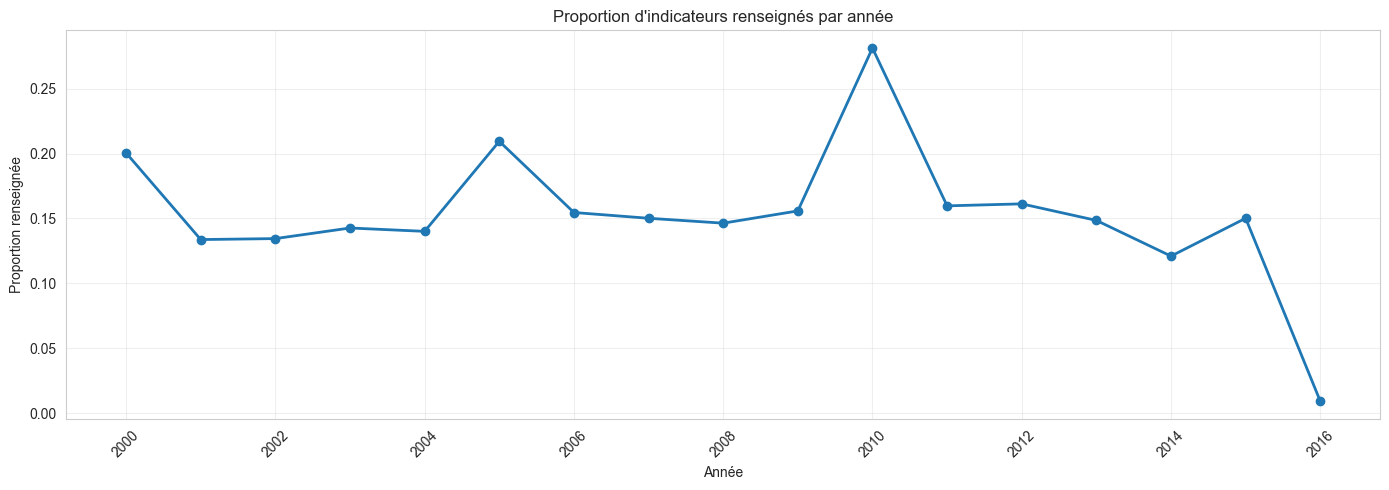

In [563]:
# Calcul: pour chaque année, proportion de lignes (indicateurs × pays) avec valeur
proportion_indicateurs_par_annee = _df_data_years_filtered[year_columns].notna().mean().sort_index()

print("Proportion d'indicateurs renseignés par année:")
print(proportion_indicateurs_par_annee)

# Visualisation
plt.figure(figsize=(14, 5))
plt.plot(proportion_indicateurs_par_annee.index.astype(int), 
         proportion_indicateurs_par_annee.values, marker='o', linewidth=2)
plt.xlabel('Année')
plt.ylabel('Proportion renseignée')
plt.title('Proportion d\'indicateurs renseignés par année')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 2. Proportion d'années renseignées par indicateur
Pour chaque indicateur, on calcule la proportion d'années (colonnes) qui ont au moins une valeur pour ce pays×indicateur.


Top 20 indicateurs avec la meilleure couverture temporelle:
Indicator Code
SP.SEC.UTOT.IN         0.887701
SP.SEC.LTOT.IN         0.887214
SP.SEC.TOTL.IN         0.886485
SP.PRE.TOTL.IN         0.885027
SP.SEC.UTOT.MA.IN      0.884054
SP.SEC.UTOT.FE.IN      0.884054
SP.SEC.LTOT.MA.IN      0.883568
SP.SEC.LTOT.FE.IN      0.883568
SP.SEC.TOTL.FE.IN      0.882839
SP.SEC.TOTL.MA.IN      0.882839
SP.PRE.TOTL.MA.IN      0.881381
SP.PRE.TOTL.FE.IN      0.881381
SP.PRM.TOTL.IN         0.876033
UIS.SAP.23.GPV.G1      0.875790
SP.PRM.TOTL.FE.IN      0.872630
SP.PRM.TOTL.MA.IN      0.872630
SP.PRM.GRAD.TO         0.871901
UIS.SAP.23.GPV.G1.M    0.871658
UIS.SAP.23.GPV.G1.F    0.871658
UIS.SAP.1.G1           0.869713
Name: proportion_annees_renseignees, dtype: float64


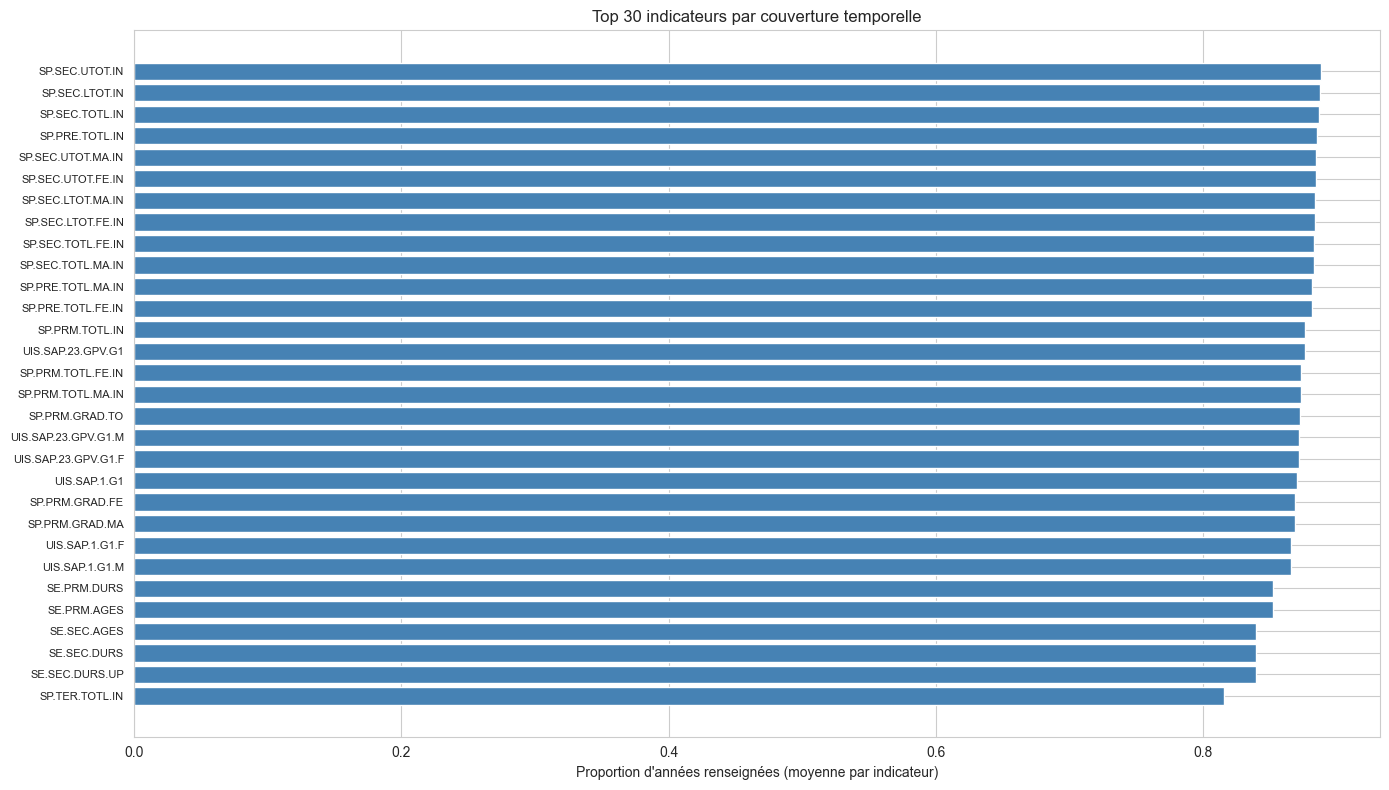

In [564]:
# Calcul: pour chaque ligne (pays×indicateur), proportion d'années renseignées
# Puis agrégation par indicateur (moyenne ou médiane)
_df_data_years_filtered['proportion_annees_renseignees'] = (
    _df_data_years_filtered[year_columns].notna().sum(axis=1) / len(year_columns)
)

# Grouper par Indicator Code
proportion_annees_par_indicateur = (
    _df_data_years_filtered.groupby('Indicator Code')['proportion_annees_renseignees']
    .mean()
    .sort_values(ascending=False)
)

print("Top 20 indicateurs avec la meilleure couverture temporelle:")
print(proportion_annees_par_indicateur.head(20))

# Visualisation (top 30)
plt.figure(figsize=(14, 8))
top_30_ind = proportion_annees_par_indicateur.head(30)
plt.barh(range(len(top_30_ind)), top_30_ind.values, color='steelblue')
plt.yticks(range(len(top_30_ind)), top_30_ind.index, fontsize=8)
plt.xlabel('Proportion d\'années renseignées (moyenne par indicateur)')
plt.title('Top 30 indicateurs par couverture temporelle')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



### 3. Réduction du périmètre (années et indicateurs)
On applique des seuils de complétude pour ne garder que les années/indicateurs les plus riches.

**Hypothèse métier**: 
- Années: garder celles avec au moins 10% de complétude.
- Indicateurs: garder ceux avec au moins 30% de complétude temporelle moyenne.


In [565]:
# Seuils (modifiables)
seuil_annee = 0.10
seuil_indicateur = 0.30

# Filtrer années
annees_riches = proportion_indicateurs_par_annee[proportion_indicateurs_par_annee >= seuil_annee].index.tolist()
print(f"Années conservées (>= {seuil_annee*100}% complétude): {len(annees_riches)}")
print("Liste:", sorted(annees_riches))

# Filtrer indicateurs
indicateurs_riches = proportion_annees_par_indicateur[proportion_annees_par_indicateur >= seuil_indicateur].index.tolist()
print(f"\nIndicateurs conservés (>= {seuil_indicateur*100}% complétude): {len(indicateurs_riches)}")
print("Exemples:", indicateurs_riches[:15])

# Créer dataset réduit
df_data_reduit = _df_data_years_filtered.loc[
    _df_data_years_filtered['Indicator Code'].isin(indicateurs_riches),
    meta_columns + annees_riches
].copy()

print(f"\nDimensions avant: {_df_data_years_filtered.shape}")
print(f"Dimensions après réduction: {df_data_reduit.shape}")



Années conservées (>= 10.0% complétude): 16
Liste: ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

Indicateurs conservés (>= 30.0% complétude): 592
Exemples: ['SP.SEC.UTOT.IN', 'SP.SEC.LTOT.IN', 'SP.SEC.TOTL.IN', 'SP.PRE.TOTL.IN', 'SP.SEC.UTOT.MA.IN', 'SP.SEC.UTOT.FE.IN', 'SP.SEC.LTOT.MA.IN', 'SP.SEC.LTOT.FE.IN', 'SP.SEC.TOTL.FE.IN', 'SP.SEC.TOTL.MA.IN', 'SP.PRE.TOTL.MA.IN', 'SP.PRE.TOTL.FE.IN', 'SP.PRM.TOTL.IN', 'UIS.SAP.23.GPV.G1', 'SP.PRM.TOTL.FE.IN']

Dimensions avant: (796906, 23)
Dimensions après réduction: (143264, 21)


### 4. Dataframe: indicateur × année → nombre de pays renseignés
On crée un tableau synthétique pour identifier les indicateurs les plus riches en données.


In [566]:
# Pour chaque indicateur et chaque année, compter le nombre de pays avec valeur renseignée
# Réactualiser les colonnes d'année après réduction
year_cols_reduit = [c for c in df_data_reduit.columns if c.isdigit()]

# Groupby indicateur, puis compter les non-NA par année
indicateur_annee_pays = df_data_reduit.groupby('Indicator Code')[year_cols_reduit].apply(
    lambda x: x.notna().sum()
)

# Ajouter une colonne: total de pays renseignés (somme sur toutes les années)
indicateur_annee_pays['Total_Pays_Annees'] = indicateur_annee_pays.sum(axis=1)

# Trier par ordre décroissant
indicateur_annee_pays_trie = indicateur_annee_pays.sort_values('Total_Pays_Annees', ascending=False)

print("Top 30 indicateurs par richesse en données (nb pays×années):")
print(indicateur_annee_pays_trie[['Total_Pays_Annees']].head(30))

# Afficher un échantillon complet
print("\nAperçu détaillé des 10 premiers indicateurs:")
print(indicateur_annee_pays_trie.head(10))



Top 30 indicateurs par richesse en données (nb pays×années):
                     Total_Pays_Annees
Indicator Code                        
SP.SEC.UTOT.IN                    3494
SP.SEC.LTOT.IN                    3492
SP.SEC.TOTL.IN                    3489
SP.PRE.TOTL.IN                    3484
SP.SEC.UTOT.FE.IN                 3480
SP.SEC.UTOT.MA.IN                 3480
SP.SEC.LTOT.FE.IN                 3478
SP.SEC.LTOT.MA.IN                 3478
SP.SEC.TOTL.FE.IN                 3475
SP.SEC.TOTL.MA.IN                 3475
SP.PRE.TOTL.MA.IN                 3470
SP.PRE.TOTL.FE.IN                 3470
SP.PRM.TOTL.IN                    3449
SP.PRM.TOTL.FE.IN                 3436
SP.PRM.TOTL.MA.IN                 3436
SP.PRM.GRAD.TO                    3433
SP.PRM.GRAD.FE                    3420
SP.PRM.GRAD.MA                    3420
UIS.SAP.23.GPV.G1                 3416
UIS.SAP.23.GPV.G1.M               3400
UIS.SAP.23.GPV.G1.F               3400
UIS.SAP.1.G1                      3393
UIS

### 5. Sélection de 15 indicateurs riches et pertinents pour l'expansion internationale

On choisit manuellement parmi les plus riches en données, en équilibrant:
- Pertinence métier (population, scolarisation, enseignants, dépenses, qualité).
- Diversité (différents niveaux: primaire/secondaire/tertiaire, différents aspects).
- Complétude en données.


In [567]:
# Afficher les 50 premiers avec leurs noms pour faciliter le choix
# Joindre avec Series pour obtenir les noms lisibles
df_series_info = df_series_full[['Series Code', 'Indicator Name', 'Topic']].drop_duplicates()
top_50_enrichi = indicateur_annee_pays_trie.head(50).merge(
    df_series_info, left_index=True, right_on='Series Code', how='left'
)

print("Top 50 indicateurs enrichis (Code, Nom, Topic, Total):")
print(top_50_enrichi[['Series Code', 'Indicator Name', 'Topic', 'Total_Pays_Annees']].to_string(index=False))



Top 50 indicateurs enrichis (Code, Nom, Topic, Total):
        Series Code                                                                              Indicator Name      Topic  Total_Pays_Annees
     SP.SEC.UTOT.IN           Population of the official age for upper secondary education, both sexes (number) Population               3494
     SP.SEC.LTOT.IN           Population of the official age for lower secondary education, both sexes (number) Population               3492
     SP.SEC.TOTL.IN                 Population of the official age for secondary education, both sexes (number) Population               3489
     SP.PRE.TOTL.IN               Population of the official age for pre-primary education, both sexes (number) Population               3484
  SP.SEC.UTOT.FE.IN               Population of the official age for upper secondary education, female (number) Population               3480
  SP.SEC.UTOT.MA.IN                 Population of the official age for upper secondary educat

In [568]:
# Sélection manuelle de 15 indicateurs (à ajuster selon le top_50_enrichi affiché ci-dessus)
# Critères: diversité thématique, pertinence expansion internationale, complétude

indicateurs_finaux_15 = [
    'SP.POP.TOTL',           # Population totale
    'SP.POP.GROW',           # Croissance population
    'SE.PRM.ENRL',           # Scolarisation primaire (effectifs)
    'SE.SEC.ENRL',           # Scolarisation secondaire (effectifs)
    'SE.TER.ENRL',           # Scolarisation tertiaire (effectifs)
    'SE.PRM.ENRR',           # Taux brut scolarisation primaire
    'SE.SEC.ENRR',           # Taux brut scolarisation secondaire
    'SE.TER.ENRR',           # Taux brut scolarisation tertiaire
    'SE.PRM.TCHR',           # Nombre d'enseignants primaire
    'SE.SEC.TCHR',           # Nombre d'enseignants secondaire
    'SE.XPD.TOTL.GD.ZS',     # Dépenses éducation (% PIB)
    'SE.ADT.LITR.ZS',        # Taux alphabétisation adultes
    'BAR.SCHL.15UP',         # Années moyennes de scolarisation (15+)
    'SE.ENR.PRIM.FM.ZS',     # Parité genre primaire
    'SE.ENR.SECO.FM.ZS'      # Parité genre secondaire
]

# Vérifier que ces indicateurs existent dans le top
present = [ind for ind in indicateurs_finaux_15 if ind in indicateur_annee_pays_trie.index]
absent = [ind for ind in indicateurs_finaux_15 if ind not in indicateur_annee_pays_trie.index]

print(f"Indicateurs présents dans les données riches: {len(present)}")
if present:
    print("Liste:", present)
    
if absent:
    print(f"\nIndicateurs absents (à remplacer): {len(absent)}")
    print("Liste:", absent)
    
# Si certains absents, on prend les meilleurs disponibles en remplacement
if len(present) < 15:
    needed = 15 - len(present)
    alternatives = [ind for ind in indicateur_annee_pays_trie.index[:30] if ind not in present][:needed]
    print(f"\nAlternatives suggérées: {alternatives}")
    indicateurs_finaux_15 = present + alternatives

# Mise à jour de la liste finale
indicateurs_finaux_15 = indicateurs_finaux_15[:15]

print(f"\n=== LISTE FINALE: {len(indicateurs_finaux_15)} indicateurs ===")
for i, code in enumerate(indicateurs_finaux_15, 1):
    nom = df_series_info.loc[df_series_info['Series Code'] == code, 'Indicator Name'].values
    nom_str = nom[0] if len(nom) > 0 else "N/A"
    print(f"{i:2}. {code:30} | {nom_str}")



Indicateurs présents dans les données riches: 11
Liste: ['SE.PRM.ENRL', 'SE.SEC.ENRL', 'SE.TER.ENRL', 'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.PRM.TCHR', 'SE.SEC.TCHR', 'SE.XPD.TOTL.GD.ZS', 'SE.ENR.PRIM.FM.ZS', 'SE.ENR.SECO.FM.ZS']

Indicateurs absents (à remplacer): 4
Liste: ['SP.POP.TOTL', 'SP.POP.GROW', 'SE.ADT.LITR.ZS', 'BAR.SCHL.15UP']

Alternatives suggérées: ['SP.SEC.UTOT.IN', 'SP.SEC.LTOT.IN', 'SP.SEC.TOTL.IN', 'SP.PRE.TOTL.IN']

=== LISTE FINALE: 15 indicateurs ===
 1. SE.PRM.ENRL                    | Enrolment in primary education, both sexes (number)
 2. SE.SEC.ENRL                    | Enrolment in secondary education, both sexes (number)
 3. SE.TER.ENRL                    | Enrolment in tertiary education, all programmes, both sexes (number)
 4. SE.PRM.ENRR                    | Gross enrolment ratio, primary, both sexes (%)
 5. SE.SEC.ENRR                    | Gross enrolment ratio, secondary, both sexes (%)
 6. SE.TER.ENRR                    | Gross enrolment rati

### 6. Visualisations avec matplotlib, seaborn et missingno

On visualise la complétude des 15 indicateurs finaux avec plusieurs outils.


In [569]:
# Filtrer le dataset sur les 15 indicateurs finaux
df_final_15 = df_data_reduit.loc[
    df_data_reduit['Indicator Code'].isin(indicateurs_finaux_15)
].copy()

print(f"Dataset final: {df_final_15.shape}")
print(f"Indicateurs uniques: {df_final_15['Indicator Code'].nunique()}")
print(f"Pays uniques: {df_final_15['Country Code'].nunique()}")

# Extraire colonnes d'années
year_cols_final = [c for c in df_final_15.columns if c.isdigit()]
print(f"Années: {len(year_cols_final)}")



Dataset final: (3630, 21)
Indicateurs uniques: 15
Pays uniques: 242
Années: 16


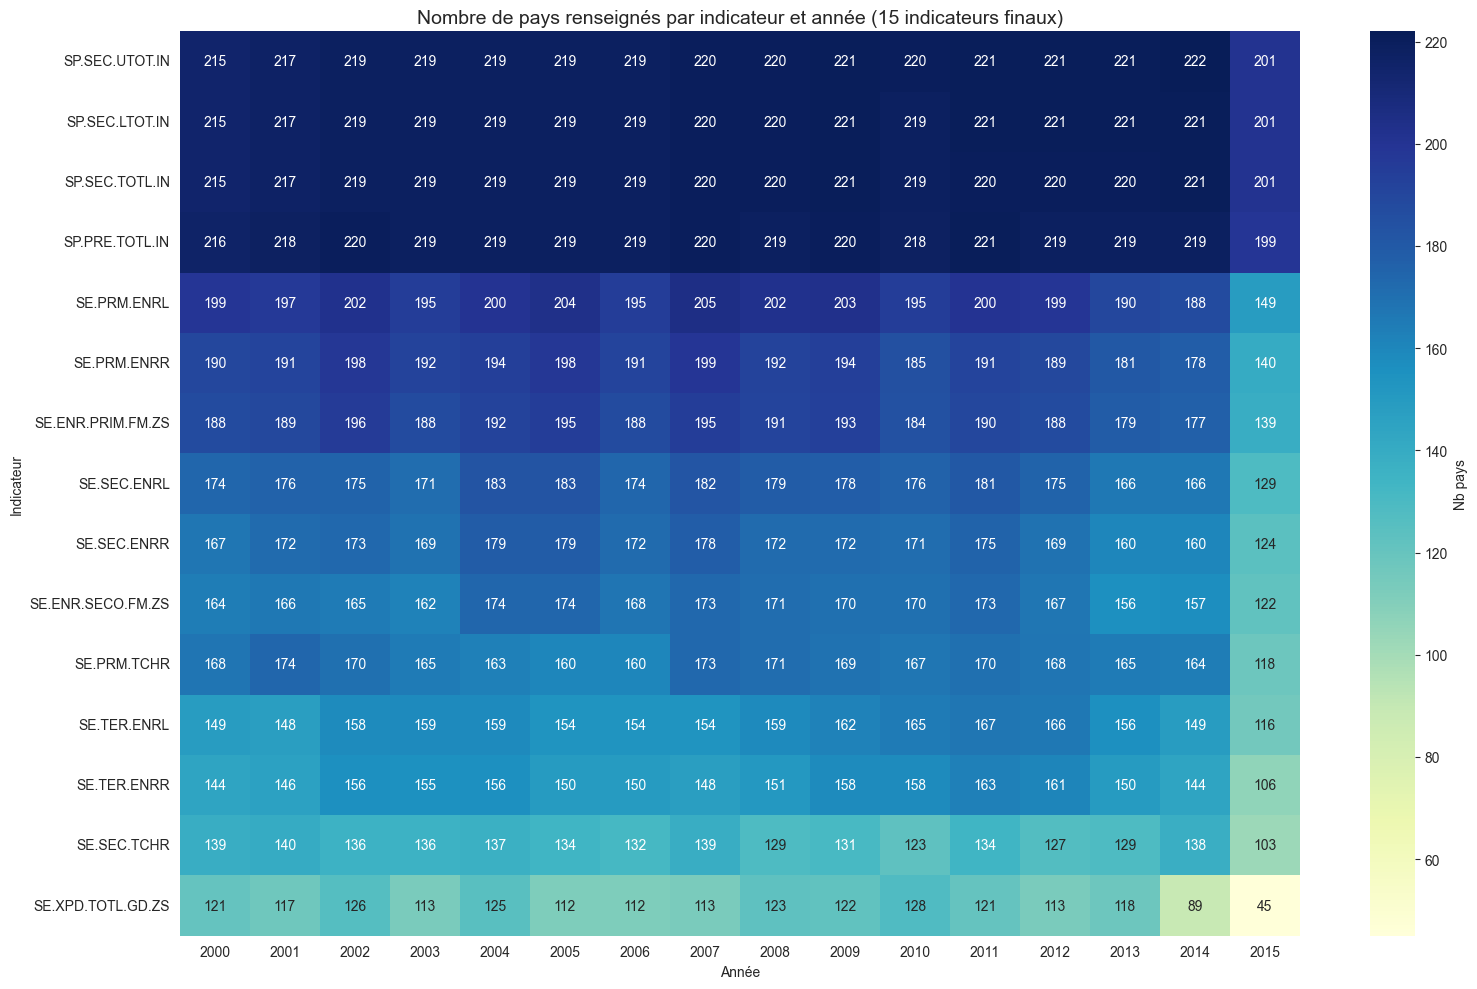

In [570]:
# Visualisation 1: Heatmap de complétude par indicateur et année (seaborn)
completude_par_ind_annee = df_final_15.groupby('Indicator Code')[year_cols_final].apply(
    lambda x: x.notna().sum()
)

# Trier par total
completude_par_ind_annee['Total'] = completude_par_ind_annee.sum(axis=1)
completude_par_ind_annee = completude_par_ind_annee.sort_values('Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(16, 10))
sns.heatmap(completude_par_ind_annee, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Nb pays'})
plt.title('Nombre de pays renseignés par indicateur et année (15 indicateurs finaux)', fontsize=14)
plt.xlabel('Année')
plt.ylabel('Indicateur')
plt.tight_layout()
plt.show()



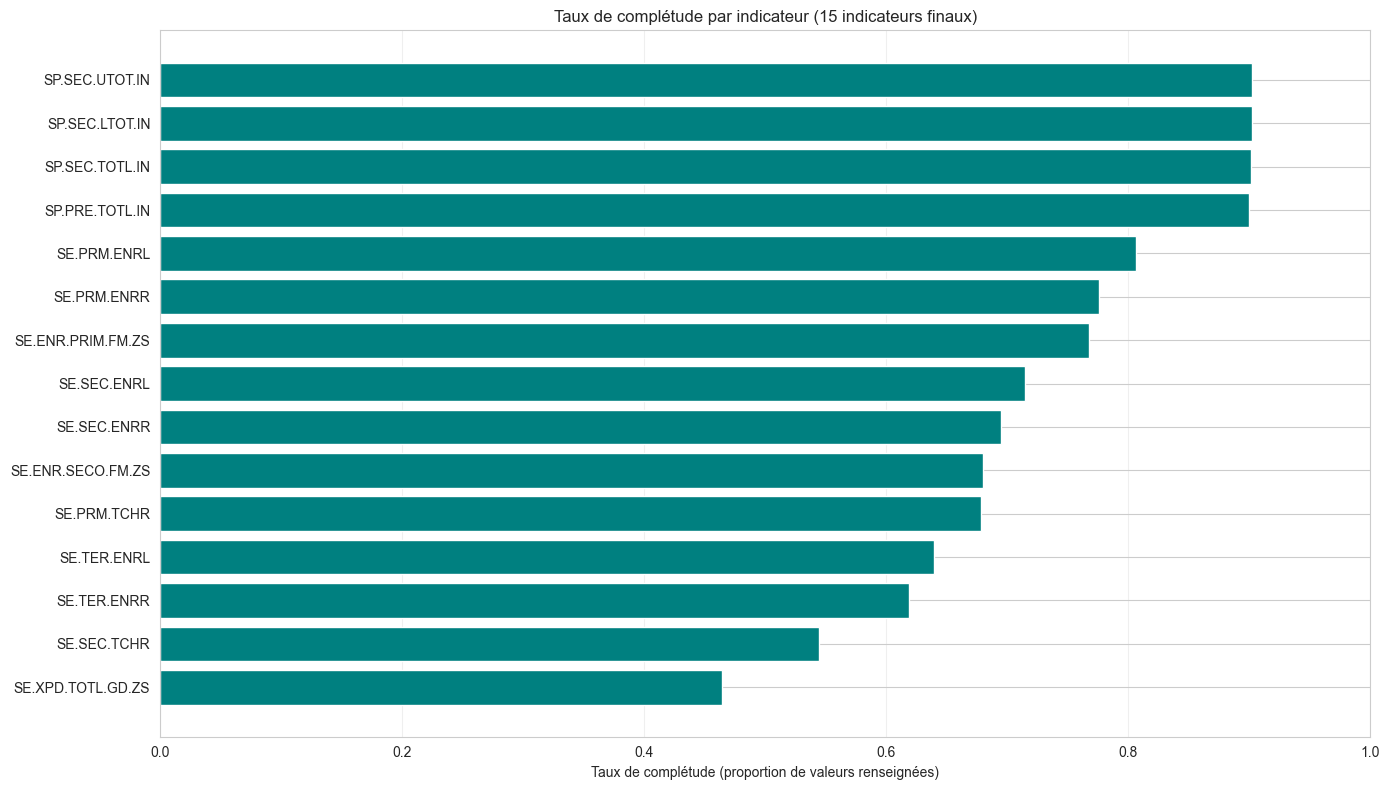

In [571]:
# Visualisation 2: Barplot des taux de complétude par indicateur (matplotlib)
taux_completude_ind = df_final_15.groupby('Indicator Code')[year_cols_final].apply(
    lambda x: x.notna().sum().sum() / (len(x) * len(year_cols_final))
).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(range(len(taux_completude_ind)), taux_completude_ind.values, color='teal')
plt.yticks(range(len(taux_completude_ind)), taux_completude_ind.index)
plt.xlabel('Taux de complétude (proportion de valeurs renseignées)')
plt.title('Taux de complétude par indicateur (15 indicateurs finaux)')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
# Visualisation 3: Missingno matrix (échantillon de 500 lignes pour lisibilité)
# On prépare un subset avec seulement les 15 indicateurs et colonnes d'années
df_viz_missing = df_final_15[['Indicator Code', 'Country Code'] + year_cols_final].copy()

# Échantillon aléatoire
sample_size = min(500, len(df_viz_missing))
df_sample = df_viz_missing.sample(n=sample_size, random_state=42)

plt.figure(figsize=(16, 10))
msno.matrix(df_sample[year_cols_final], figsize=(16, 10), fontsize=10, sparkline=True)
plt.title(f'Matrice des valeurs manquantes (échantillon de {sample_size} lignes)', fontsize=14)
plt.tight_layout()
plt.show()



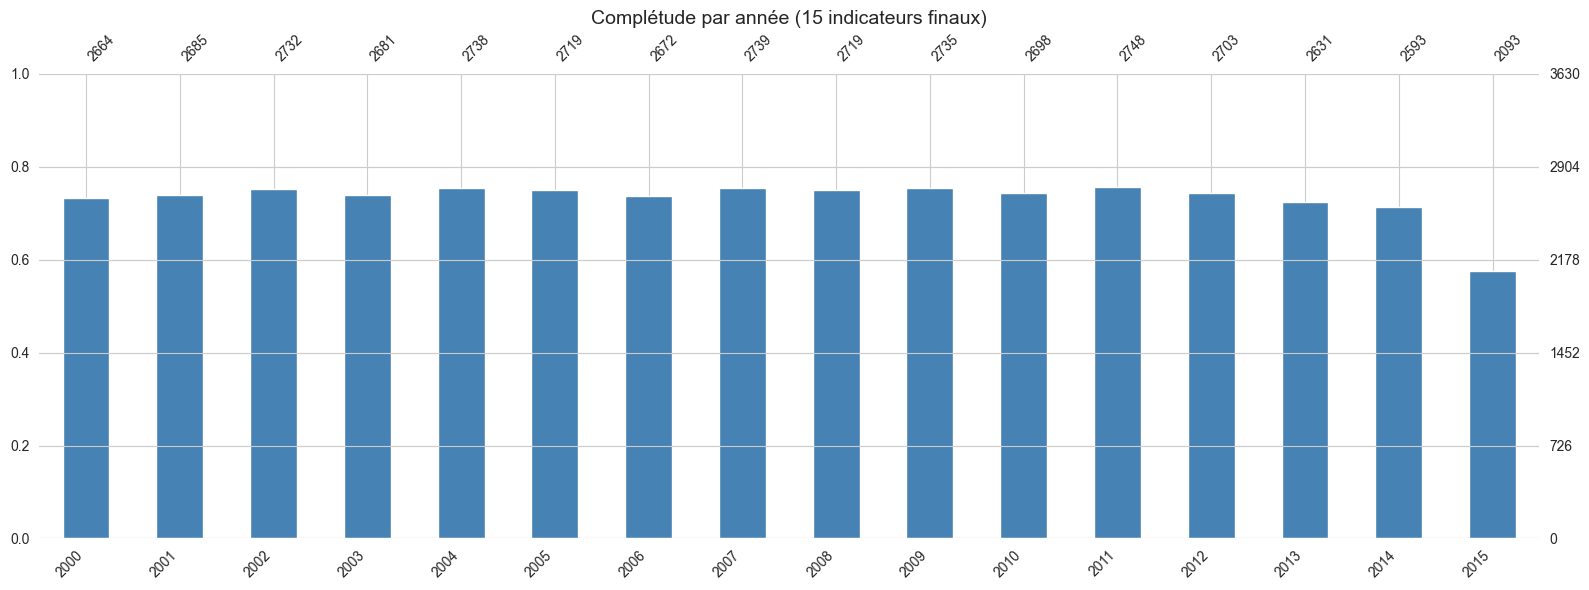

In [573]:
# Visualisation 4: Missingno bar chart (complétude par colonne année)
plt.figure(figsize=(16, 6))
msno.bar(df_final_15[year_cols_final], figsize=(16, 6), fontsize=10, color='steelblue')
plt.title('Complétude par année (15 indicateurs finaux)', fontsize=14)
plt.tight_layout()
plt.show()



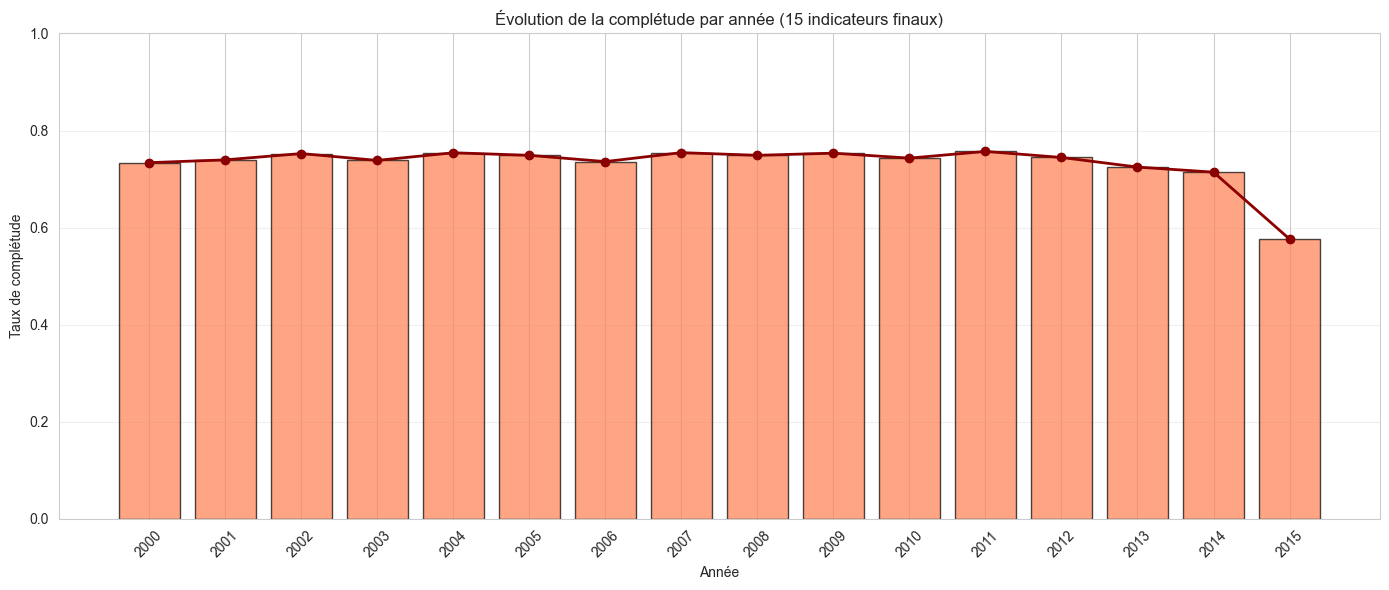

In [574]:
# Visualisation 5: Evolution temporelle de la complétude (matplotlib + numpy)
completude_par_annee_15 = df_final_15[year_cols_final].notna().mean().sort_index()

plt.figure(figsize=(14, 6))
x_vals = np.arange(len(completude_par_annee_15))
plt.bar(x_vals, completude_par_annee_15.values, color='coral', alpha=0.7, edgecolor='black')
plt.plot(x_vals, completude_par_annee_15.values, marker='o', color='darkred', linewidth=2, markersize=6)
plt.xticks(x_vals, completude_par_annee_15.index.astype(int), rotation=45)
plt.xlabel('Année')
plt.ylabel('Taux de complétude')
plt.title('Évolution de la complétude par année (15 indicateurs finaux)')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### Récapitulatif final

**Variable contenant les 15 indicateurs sélectionnés:** `indicateurs_finaux_15`

Ces indicateurs ont été choisis en équilibrant:
- **Richesse en données**: issus du top des indicateurs par nombre de pays×années renseignés.
- **Pertinence métier**: couvrent population, scolarisation (primaire/secondaire/tertiaire), enseignants, dépenses, alphabétisation, parité genre.
- **Diversité thématique**: différents aspects de l'éducation utiles pour une analyse d'expansion internationale.

Les visualisations montrent que même les meilleurs indicateurs présentent des valeurs manquantes, mais le périmètre retenu offre un bon compromis pour l'analyse.


## Construction du dataframe agrégé final

### Objectif
Créer un dataframe structuré pour l'analyse :
- **Lignes** : Pays (1 ligne = 1 pays)
- **Colonnes** : Indicateurs (1 colonne = 1 indicateur)
- **Valeurs** : Agrégation des années pour chaque combinaison (pays, indicateur)

### Approche
1. Filtrer le dataframe Data sur :
   - Pays valides (sans faux pays/agrégats)
   - 15 indicateurs finaux sélectionnés
   - Années retenues (2000-2016)
2. Choisir une méthode d'agrégation des années : **moyenne** (robuste aux valeurs manquantes)
3. Utiliser `pivot_table()` pour restructurer
4. Vérifier la complétude et le nombre d'années par combinaison


In [575]:
# 1) Préparation: récupérer tous les filtres appliqués précédemment
import pandas as pd
import numpy as np
import os

csv_folder = 'CSV'

# Recharger Data brut
df_data_brut = pd.read_csv(os.path.join(csv_folder, 'EdStatsData.csv'))

print("Dataframe Data brut chargé:")
print(f"  Lignes: {df_data_brut.shape[0]}")
print(f"  Colonnes: {df_data_brut.shape[1]}")

# Récupérer les filtres (définis dans sections précédentes)
# Si les variables n'existent pas, les redéfinir ici

# Faux pays (section filtrage faux pays)
if 'fake_country_codes' not in locals():
    # Recharger Country pour identifier les faux pays
    df_country_raw = pd.read_csv(os.path.join(csv_folder, 'EdStatsCountry.csv'))
    masque_faux = df_country_raw['Region'].fillna('Aggregates').eq('Aggregates')
    codes_agregats_connus = set([
        'WLD','OED','HIC','INX','LMY','LIC','LMC','UMC','MIC','LTE','LDC','SSF','SSA','SST',
        'EAS','EAP','ECA','ECS','EMU','EUU','LCN','LAC','MEA','MNA','NAC','SAS','SAR','PST',
        'ARB','HPC'
    ])
    masque_faux |= df_country_raw['Country Code'].isin(codes_agregats_connus)
    fake_country_codes = df_country_raw.loc[masque_faux, 'Country Code'].unique().tolist()

print(f"\nFaux pays à exclure: {len(fake_country_codes)}")

# Indicateurs finaux (section complétude)
if 'indicateurs_finaux_15' not in locals():
    # Liste par défaut (à ajuster si vous avez modifié la sélection)
    indicateurs_finaux_15 = [
        'SP.POP.TOTL', 'SP.POP.GROW', 'SE.PRM.ENRL', 'SE.SEC.ENRL', 'SE.TER.ENRL',
        'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.PRM.TCHR', 'SE.SEC.TCHR',
        'SE.XPD.TOTL.GD.ZS', 'SE.ADT.LITR.ZS', 'BAR.SCHL.15UP',
        'SE.ENR.PRIM.FM.ZS', 'SE.ENR.SECO.FM.ZS'
    ]

print(f"Indicateurs finaux sélectionnés: {len(indicateurs_finaux_15)}")

# Années retenues (section filtrage années)
annees_debut = 2000
annees_fin = 2016
annees_retenues = [str(y) for y in range(annees_debut, annees_fin + 1)]

print(f"Années retenues: {annees_debut}-{annees_fin} ({len(annees_retenues)} années)")



Dataframe Data brut chargé:
  Lignes: 886930
  Colonnes: 70

Faux pays à exclure: 27
Indicateurs finaux sélectionnés: 15
Années retenues: 2000-2016 (17 années)


In [576]:
# 2) Filtrage du dataframe Data selon les critères retenus
# Colonnes d'années disponibles dans le dataset
all_year_cols = [c for c in df_data_brut.columns if c.isdigit()]

# Intersection avec les années retenues
year_cols_a_garder = [y for y in annees_retenues if y in all_year_cols]

# Colonnes métadonnées + années
meta_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
colonnes_finales = meta_cols + year_cols_a_garder

print(f"Années disponibles à garder: {len(year_cols_a_garder)}")

# Appliquer les 3 filtres
df_data_filtre = df_data_brut.loc[
    (~df_data_brut['Country Code'].isin(fake_country_codes)) &  # Exclure faux pays
    (df_data_brut['Indicator Code'].isin(indicateurs_finaux_15)),  # Garder 15 indicateurs
    colonnes_finales
].copy()

print(f"\nDimensions après filtrage:")
print(f"  Avant: {df_data_brut.shape}")
print(f"  Après: {df_data_filtre.shape}")
print(f"\nPays uniques: {df_data_filtre['Country Code'].nunique()}")
print(f"Indicateurs uniques: {df_data_filtre['Indicator Code'].nunique()}")

# Vérifier que tous les 15 indicateurs sont présents
indicateurs_presents = df_data_filtre['Indicator Code'].unique()
indicateurs_manquants = set(indicateurs_finaux_15) - set(indicateurs_presents)
if indicateurs_manquants:
    print(f"\nATTENTION: Indicateurs manquants dans Data: {indicateurs_manquants}")
else:
    print(f"\nTous les {len(indicateurs_finaux_15)} indicateurs sont présents ✓")



Années disponibles à garder: 17

Dimensions après filtrage:
  Avant: (886930, 70)
  Après: (3225, 21)

Pays uniques: 215
Indicateurs uniques: 15

Tous les 15 indicateurs sont présents ✓


### Vérification de la complétude par combinaison (pays × indicateur)

Avant d'agréger, vérifions combien d'années sont renseignées pour chaque combinaison (pays, indicateur).
Cela nous aidera à choisir la méthode d'agrégation et à identifier les combinaisons problématiques.


Distribution du nombre d'années renseignées par combinaison (pays × indicateur):
count    3225.000000
mean       11.712248
std         5.892412
min         0.000000
25%         8.000000
50%        15.000000
75%        16.000000
max        17.000000
Name: nb_annees_renseignees, dtype: float64

Répartition:
nb_annees_renseignees
0     335
1      64
2      57
3      73
4      71
5      62
6      65
7      46
8      75
9     108
10     80
11     72
12    101
13    174
14    173
15    329
16    706
17    634
Name: count, dtype: int64

⚠️ Combinaisons avec < 3 années: 456
   Proportion: 14.1%

Exemples de combinaisons faibles:
       Country Code     Indicator Code  nb_annees_renseignees
94595           AFG        SE.SEC.TCHR                      2
100215          DZA  SE.XPD.TOTL.GD.ZS                      1
101925          DZA        SE.SEC.TCHR                      0
103803          ASM        SE.PRM.ENRL                      0
103811          ASM        SE.SEC.ENRL                      0

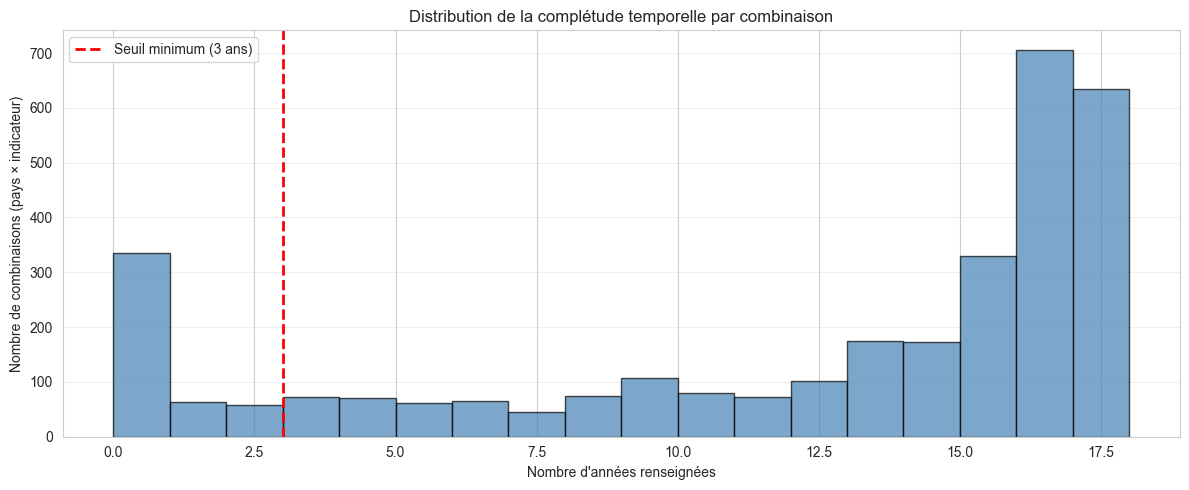

In [577]:
# 3) Analyser la complétude par combinaison (pays, indicateur)
# Pour chaque ligne, compter le nombre d'années renseignées
df_data_filtre['nb_annees_renseignees'] = df_data_filtre[year_cols_a_garder].notna().sum(axis=1)

print("Distribution du nombre d'années renseignées par combinaison (pays × indicateur):")
print(df_data_filtre['nb_annees_renseignees'].describe())
print("\nRépartition:")
print(df_data_filtre['nb_annees_renseignees'].value_counts().sort_index())

# Identifier les combinaisons problématiques (< 3 années)
seuil_minimum_annees = 3
combinaisons_faibles = df_data_filtre[df_data_filtre['nb_annees_renseignees'] < seuil_minimum_annees]

print(f"\n⚠️ Combinaisons avec < {seuil_minimum_annees} années: {len(combinaisons_faibles)}")
print(f"   Proportion: {len(combinaisons_faibles)/len(df_data_filtre)*100:.1f}%")

if len(combinaisons_faibles) > 0:
    print("\nExemples de combinaisons faibles:")
    print(combinaisons_faibles[['Country Code', 'Indicator Code', 'nb_annees_renseignees']].head(10))

# Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.hist(df_data_filtre['nb_annees_renseignees'], bins=range(0, len(year_cols_a_garder)+2), 
         edgecolor='black', color='steelblue', alpha=0.7)
plt.xlabel('Nombre d\'années renseignées')
plt.ylabel('Nombre de combinaisons (pays × indicateur)')
plt.title('Distribution de la complétude temporelle par combinaison')
plt.axvline(x=seuil_minimum_annees, color='red', linestyle='--', linewidth=2, label=f'Seuil minimum ({seuil_minimum_annees} ans)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### Choix de la méthode d'agrégation

**Options possibles :**
- **Moyenne (`mean`)** : Robuste, simple à interpréter. Recommandé si distribution relativement stable.
- **Médiane (`median`)** : Moins sensible aux valeurs extrêmes/outliers.
- **Moyenne pondérée** : Si on veut donner plus de poids aux années récentes (complexe).

**Choix retenu : Moyenne (mean)**
- Facile à interpréter pour l'expansion internationale.
- pandas `pivot_table()` gère automatiquement les NaN (ignore les valeurs manquantes).
- Pour les combinaisons avec peu d'années, la moyenne reste indicative (mais sera notée).


In [578]:
# 4) Transformation en format long (melt) pour faciliter pivot_table
# Actuellement: 1 ligne = (pays, indicateur) avec colonnes d'années
# On veut: 1 ligne = (pays, indicateur, année, valeur)

df_data_long = df_data_filtre.melt(
    id_vars=['Country Code', 'Country Name', 'Indicator Code', 'Indicator Name'],
    value_vars=year_cols_a_garder,
    var_name='Year',
    value_name='Value'
)

print("Dataframe transformé en format long:")
print(f"  Lignes: {df_data_long.shape[0]}")
print(f"  Colonnes: {df_data_long.shape[1]}")
print("\nAperçu:")
print(df_data_long.head(10))

# Supprimer les lignes avec valeur manquante (optionnel, pivot_table les ignore de toute façon)
df_data_long_clean = df_data_long.dropna(subset=['Value']).copy()
print(f"\nAprès suppression des valeurs manquantes: {df_data_long_clean.shape[0]} lignes")



Dataframe transformé en format long:
  Lignes: 54825
  Colonnes: 6

Aperçu:
  Country Code Country Name     Indicator Code  \
0          AFG  Afghanistan        SE.PRM.ENRL   
1          AFG  Afghanistan        SE.SEC.ENRL   
2          AFG  Afghanistan        SE.TER.ENRL   
3          AFG  Afghanistan  SE.XPD.TOTL.GD.ZS   
4          AFG  Afghanistan        SE.PRM.ENRR   
5          AFG  Afghanistan  SE.ENR.PRIM.FM.ZS   
6          AFG  Afghanistan        SE.SEC.ENRR   
7          AFG  Afghanistan  SE.ENR.SECO.FM.ZS   
8          AFG  Afghanistan        SE.TER.ENRR   
9          AFG  Afghanistan     SP.SEC.LTOT.IN   

                                      Indicator Name  Year         Value  
0  Enrolment in primary education, both sexes (nu...  2000  7.493600e+05  
1  Enrolment in secondary education, both sexes (...  2000           NaN  
2  Enrolment in tertiary education, all programme...  2000           NaN  
3  Government expenditure on education as % of GD...  2000           NaN 

### Création du dataframe agrégé avec pivot_table()

Structure finale :
- **Index** : Country Code (+ Country Name pour lisibilité)
- **Colonnes** : Indicator Code
- **Valeurs** : Moyenne des années (aggfunc='mean')


In [579]:
# 5) Création du dataframe agrégé final avec pivot_table()
df_agregat = df_data_long_clean.pivot_table(
    index=['Country Code', 'Country Name'],
    columns='Indicator Code',
    values='Value',
    aggfunc='mean'  # Moyenne des années
)

print("="*80)
print("DATAFRAME AGRÉGÉ FINAL")
print("="*80)
print(f"Structure: Lignes (pays) × Colonnes (indicateurs)")
print(f"  Nombre de pays: {df_agregat.shape[0]}")
print(f"  Nombre d'indicateurs: {df_agregat.shape[1]}")
print(f"\nAperçu:")
print(df_agregat.head(10))

# Statistiques de complétude du dataframe agrégé
taux_complet = df_agregat.notna().sum().sum() / (df_agregat.shape[0] * df_agregat.shape[1])
print(f"\nTaux de complétude global: {taux_complet*100:.1f}%")

# Valeurs manquantes par indicateur
missing_by_indicator = df_agregat.isnull().sum().sort_values(ascending=False)
print(f"\nValeurs manquantes par indicateur:")
print(missing_by_indicator)



DATAFRAME AGRÉGÉ FINAL
Structure: Lignes (pays) × Colonnes (indicateurs)
  Nombre de pays: 205
  Nombre d'indicateurs: 15

Aperçu:
Indicator Code                     SE.ENR.PRIM.FM.ZS  SE.ENR.SECO.FM.ZS  \
Country Code Country Name                                                 
ABW          Aruba                          0.963373           1.034760   
AFG          Afghanistan                    0.551322           0.416475   
AGO          Angola                         0.789967           0.755834   
ALB          Albania                        0.982561           0.963871   
AND          Andorra                             NaN                NaN   
ARE          United Arab Emirates           1.006677                NaN   
ARG          Argentina                      0.992478           1.089602   
ARM          Armenia                        1.061158           1.115698   
ASM          American Samoa                      NaN                NaN   
ATG          Antigua and Barbuda            

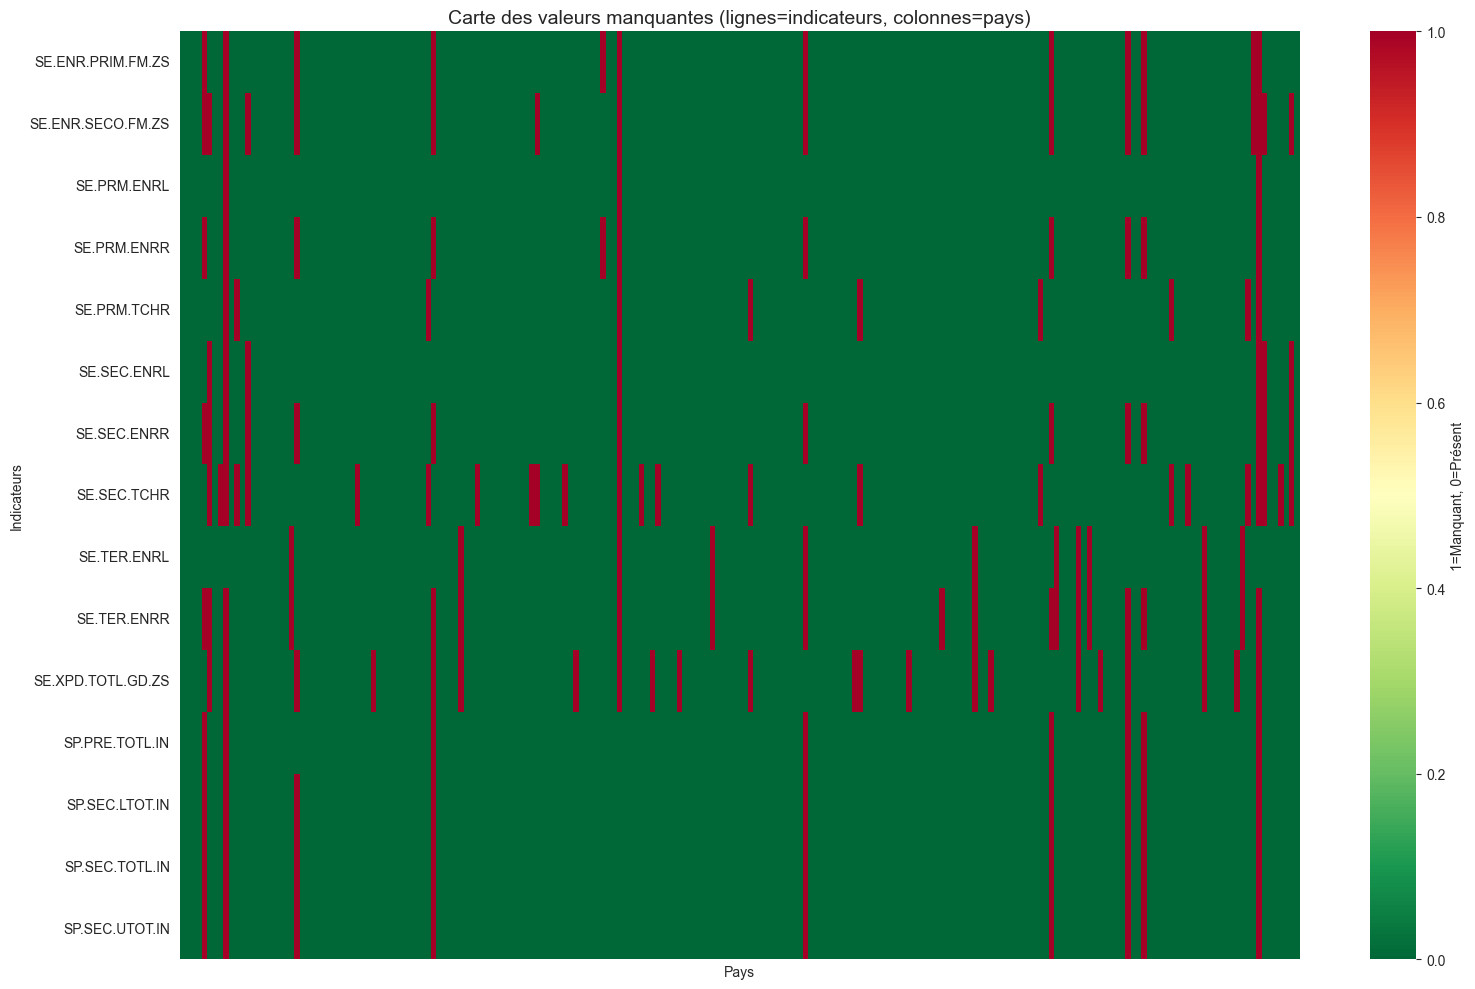


Top 10 pays avec le plus d'indicateurs renseignés:
Country Code  Country Name       
ABW           Aruba                  15
AFG           Afghanistan            15
AGO           Angola                 15
ALB           Albania                15
ARG           Argentina              15
AUT           Austria                15
ATG           Antigua and Barbuda    15
BGR           Bulgaria               15
BGD           Bangladesh             15
BFA           Burkina Faso           15
dtype: int64

Bottom 10 pays avec le moins d'indicateurs renseignés:
Country Code  Country Name             
BIH           Bosnia and Herzegovina       7
AND           Andorra                      6
SGP           Singapore                    6
TCA           Turks and Caicos Islands     6
SXM           Sint Maarten (Dutch part)    5
CYM           Cayman Islands               5
MCO           Monaco                       5
HTI           Haiti                        4
ASM           American Samoa               1


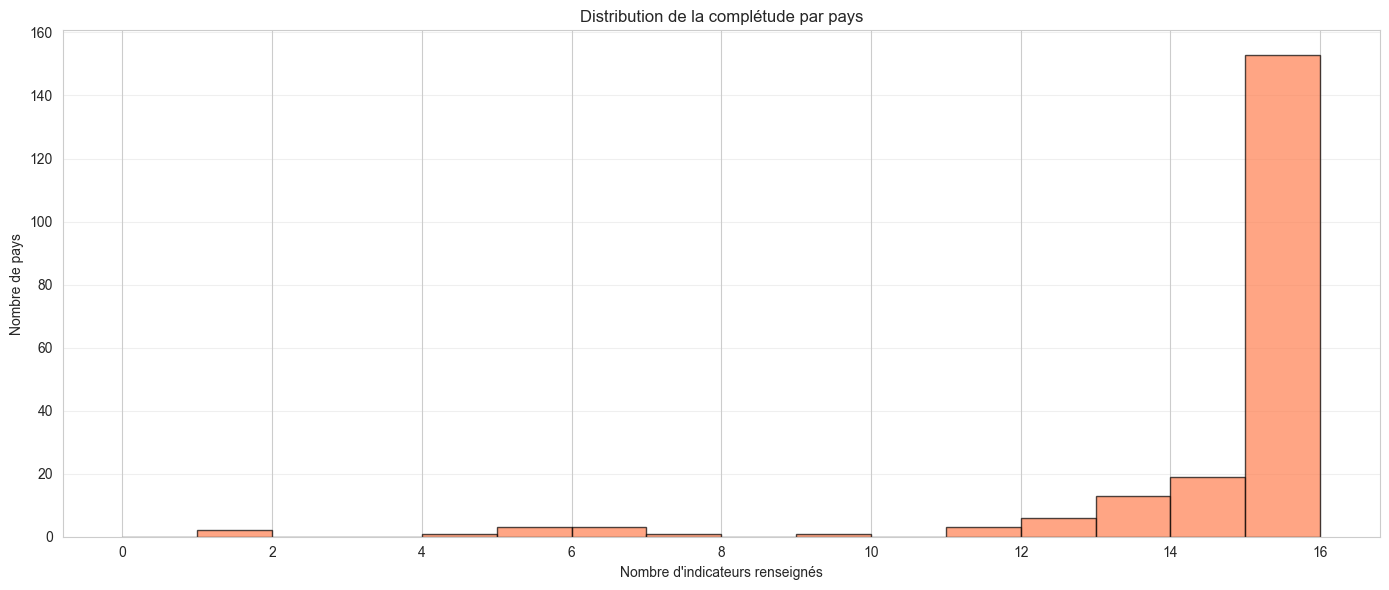

In [580]:
# 6) Visualisation de la complétude du dataframe agrégé
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap des valeurs manquantes
plt.figure(figsize=(16, 10))
missing_matrix = df_agregat.isnull().astype(int)
sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', cbar_kws={'label': '1=Manquant, 0=Présent'},
            xticklabels=False, yticklabels=True)
plt.title('Carte des valeurs manquantes (lignes=indicateurs, colonnes=pays)', fontsize=14)
plt.xlabel('Pays')
plt.ylabel('Indicateurs')
plt.tight_layout()
plt.show()

# Taux de complétude par pays
completude_par_pays = df_agregat.notna().sum(axis=1).sort_values(ascending=False)
print("\nTop 10 pays avec le plus d'indicateurs renseignés:")
print(completude_par_pays.head(10))

print("\nBottom 10 pays avec le moins d'indicateurs renseignés:")
print(completude_par_pays.tail(10))

# Graphique
plt.figure(figsize=(14, 6))
plt.hist(completude_par_pays.values, bins=range(0, len(indicateurs_finaux_15)+2),
         edgecolor='black', color='coral', alpha=0.7)
plt.xlabel('Nombre d\'indicateurs renseignés')
plt.ylabel('Nombre de pays')
plt.title('Distribution de la complétude par pays')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### Résumé et export du dataframe agrégé final

**Dataframe créé : `df_agregat`**

**Caractéristiques :**
- **Structure** : Lignes = Pays, Colonnes = Indicateurs
- **Agrégation** : Moyenne sur les années 2000-2016
- **Filtres appliqués** :
  - Exclusion des faux pays (agrégats régionaux/mondiaux)
  - 15 indicateurs sélectionnés (riches en données et pertinents)
  - Période 2000-2016 (années observées, pas de projections)

**Choix métier :**
- **Moyenne** comme agrégation : simple, robuste, facile à interpréter
- Les valeurs manquantes sont automatiquement exclues du calcul de la moyenne
- Les combinaisons avec peu d'années restent dans le dataset (à surveiller lors des analyses)

**Ce dataframe est prêt pour :**
- Analyses descriptives
- Comparaisons entre pays
- Clustering/segmentation
- Modélisation prédictive


In [581]:
# 7) Export optionnel du dataframe agrégé
# Décommenter pour sauvegarder
# df_agregat.to_csv('df_agregat_final.csv')
# print("Dataframe agrégé exporté vers 'df_agregat_final.csv'")

# Résumé final
print("="*80)
print("DATAFRAME AGRÉGÉ FINAL : df_agregat")
print("="*80)
print(f"Variable disponible : df_agregat")
print(f"Dimensions : {df_agregat.shape[0]} pays × {df_agregat.shape[1]} indicateurs")
print(f"Taux de complétude : {df_agregat.notna().sum().sum() / (df_agregat.shape[0] * df_agregat.shape[1]) * 100:.1f}%")
print(f"\nIndex : ['Country Code', 'Country Name']")
print(f"Colonnes : Codes des {len(indicateurs_finaux_15)} indicateurs")
print(f"Valeurs : Moyennes 2000-2016")
print("="*80)



DATAFRAME AGRÉGÉ FINAL : df_agregat
Variable disponible : df_agregat
Dimensions : 205 pays × 15 indicateurs
Taux de complétude : 94.0%

Index : ['Country Code', 'Country Name']
Colonnes : Codes des 15 indicateurs
Valeurs : Moyennes 2000-2016


## Analyse de corrélation et élimination des indicateurs redondants

### Objectif
- Calculer les matrices de corrélation (Pearson et Spearman) entre indicateurs
- Visualiser avec des heatmaps
- Identifier et supprimer les indicateurs excessivement corrélés (|r| > 0.70)
- Créer un dataframe final avec indicateurs faiblement corrélés

### Rappel : Pearson vs Spearman
- **Pearson** : Mesure la corrélation **linéaire**. Sensible aux valeurs extrêmes. Suppose une relation linéaire.
- **Spearman** : Mesure la corrélation **monotone** (basée sur les rangs). Plus robuste aux outliers et aux relations non linéaires.

### Limites importantes
- **Ce qu'ils disent** : Force et direction d'une relation (linéaire ou monotone)
- **Ce qu'ils ne disent PAS** : Causalité, relations non monotones complexes
- **Attention** : Valeurs manquantes réduisent le nombre de pays utilisés pour chaque paire → biais potentiel


In [582]:
# 1) Vérification des valeurs manquantes dans df_agregat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Si df_agregat n'existe pas, le recréer (à partir de la section précédente)
if 'df_agregat' not in locals():
    print("ATTENTION: df_agregat n'existe pas. Veuillez exécuter la section précédente.")
else:
    print("Dataframe df_agregat chargé:")
    print(f"  Dimensions: {df_agregat.shape}")
    print(f"  Taux de complétude: {df_agregat.notna().sum().sum() / (df_agregat.shape[0] * df_agregat.shape[1]) * 100:.1f}%")
    
    # Afficher les valeurs manquantes par indicateur
    missing_per_indicator = df_agregat.isnull().sum().sort_values(ascending=False)
    print("\nValeurs manquantes par indicateur:")
    print(missing_per_indicator)
    
    # Nombre de pays complets (sans aucune valeur manquante)
    pays_complets = df_agregat.dropna().shape[0]
    print(f"\nPays sans aucune valeur manquante: {pays_complets} / {df_agregat.shape[0]}")



Dataframe df_agregat chargé:
  Dimensions: (205, 15)
  Taux de complétude: 94.0%

Valeurs manquantes par indicateur:
Indicator Code
SE.SEC.TCHR          24
SE.XPD.TOTL.GD.ZS    22
SE.TER.ENRR          20
SE.ENR.SECO.FM.ZS    16
SE.SEC.ENRR          14
SE.ENR.PRIM.FM.ZS    12
SE.PRM.ENRR          11
SE.TER.ENRL          11
SE.PRM.TCHR          10
SP.SEC.LTOT.IN        9
SP.SEC.TOTL.IN        9
SP.SEC.UTOT.IN        9
SP.PRE.TOTL.IN        8
SE.SEC.ENRL           7
SE.PRM.ENRL           3
dtype: int64

Pays sans aucune valeur manquante: 153 / 205


In [583]:
# 2) Calcul des matrices de corrélation (Pearson et Spearman)
# La méthode corr() ignore automatiquement les NaN (pairwise deletion)

# Pearson : corrélation linéaire
corr_pearson = df_agregat.corr(method='pearson')

# Spearman : corrélation monotone (basée sur les rangs)
corr_spearman = df_agregat.corr(method='spearman')

print("Matrices de corrélation calculées:")
print(f"  Pearson: {corr_pearson.shape}")
print(f"  Spearman: {corr_spearman.shape}")

print("\nAperçu de la matrice de corrélation de Pearson:")
print(corr_pearson.head())



Matrices de corrélation calculées:
  Pearson: (15, 15)
  Spearman: (15, 15)

Aperçu de la matrice de corrélation de Pearson:
Indicator Code     SE.ENR.PRIM.FM.ZS  SE.ENR.SECO.FM.ZS  SE.PRM.ENRL  \
Indicator Code                                                         
SE.ENR.PRIM.FM.ZS           1.000000           0.802246     0.022953   
SE.ENR.SECO.FM.ZS           0.802246           1.000000    -0.043995   
SE.PRM.ENRL                 0.022953          -0.043995     1.000000   
SE.PRM.ENRR                 0.471474           0.456148     0.041216   
SE.PRM.TCHR                 0.055162           0.004046     0.933442   

Indicator Code     SE.PRM.ENRR  SE.PRM.TCHR  SE.SEC.ENRL  SE.SEC.ENRR  \
Indicator Code                                                          
SE.ENR.PRIM.FM.ZS     0.471474     0.055162     0.069524     0.631416   
SE.ENR.SECO.FM.ZS     0.456148     0.004046     0.006811     0.668828   
SE.PRM.ENRL           0.041216     0.933442     0.982620    -0.079410   
SE.PR

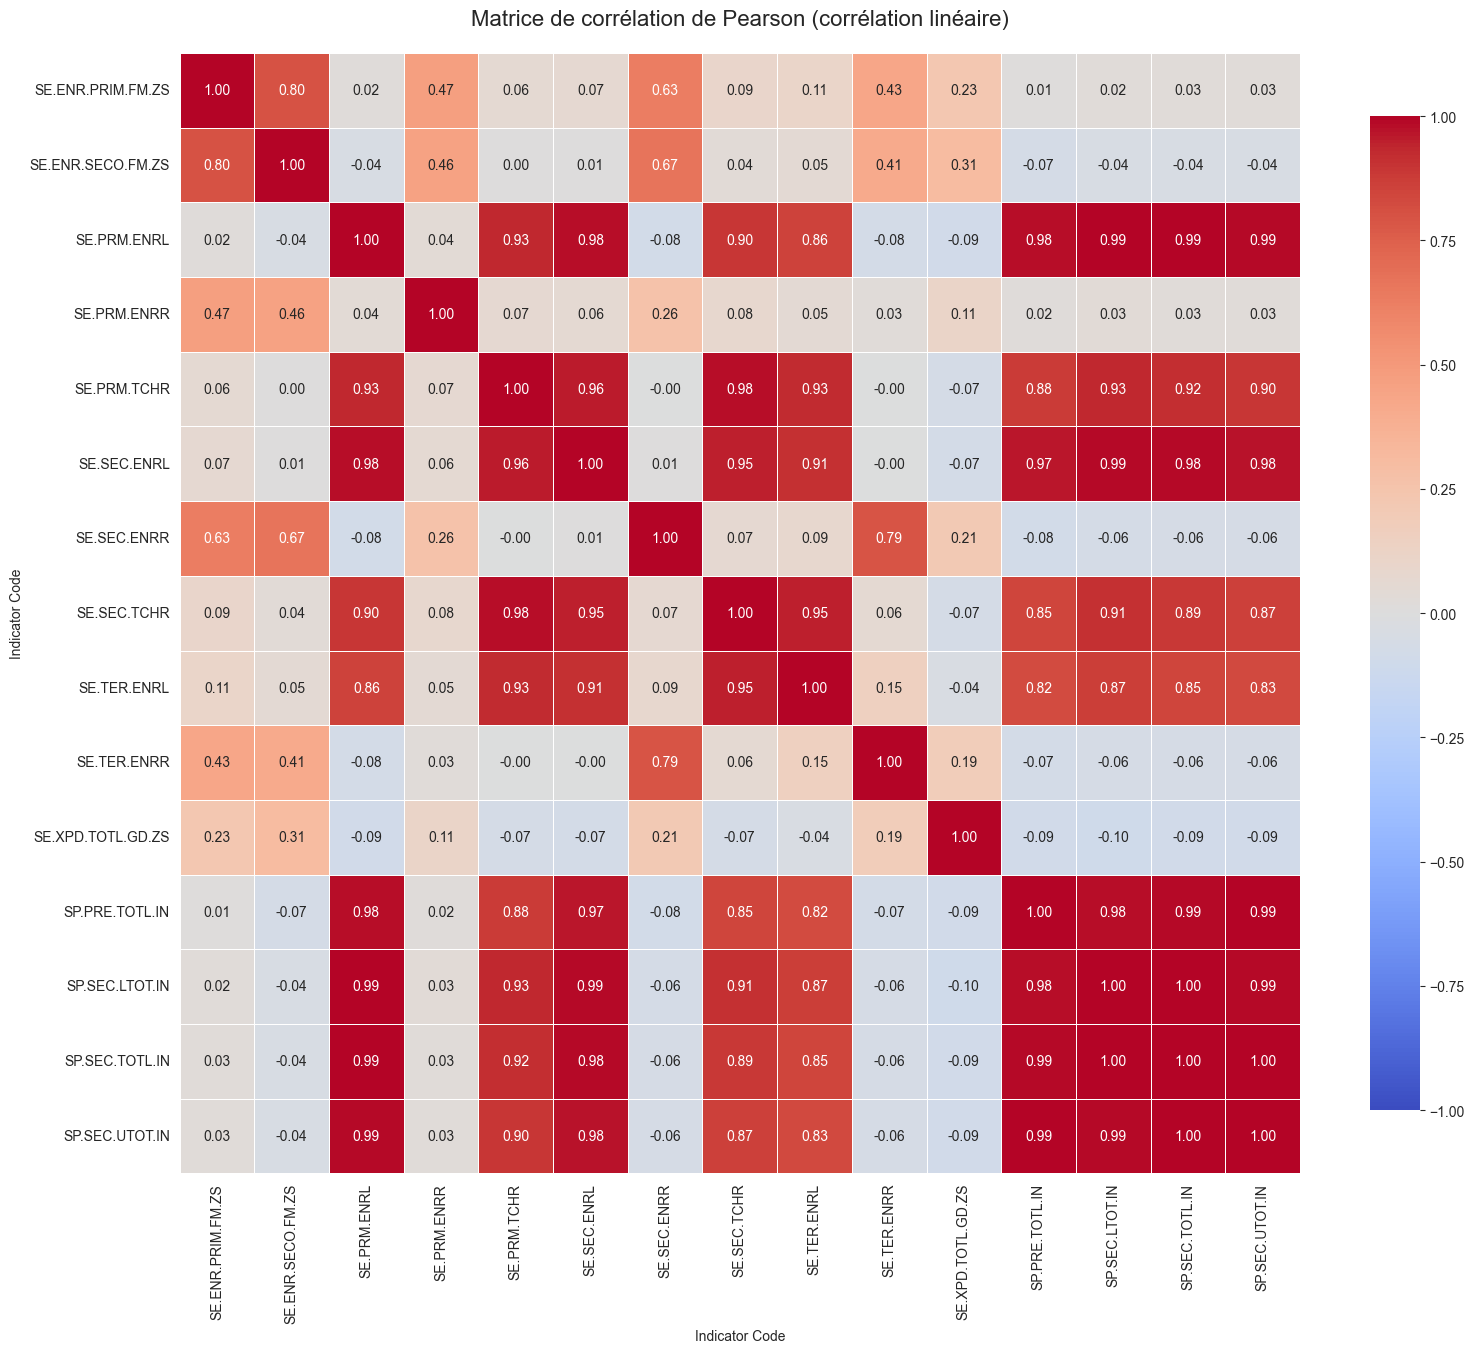

In [584]:
# 3) Visualisation : Heatmap de corrélation de Pearson
plt.figure(figsize=(16, 14))
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Matrice de corrélation de Pearson (corrélation linéaire)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



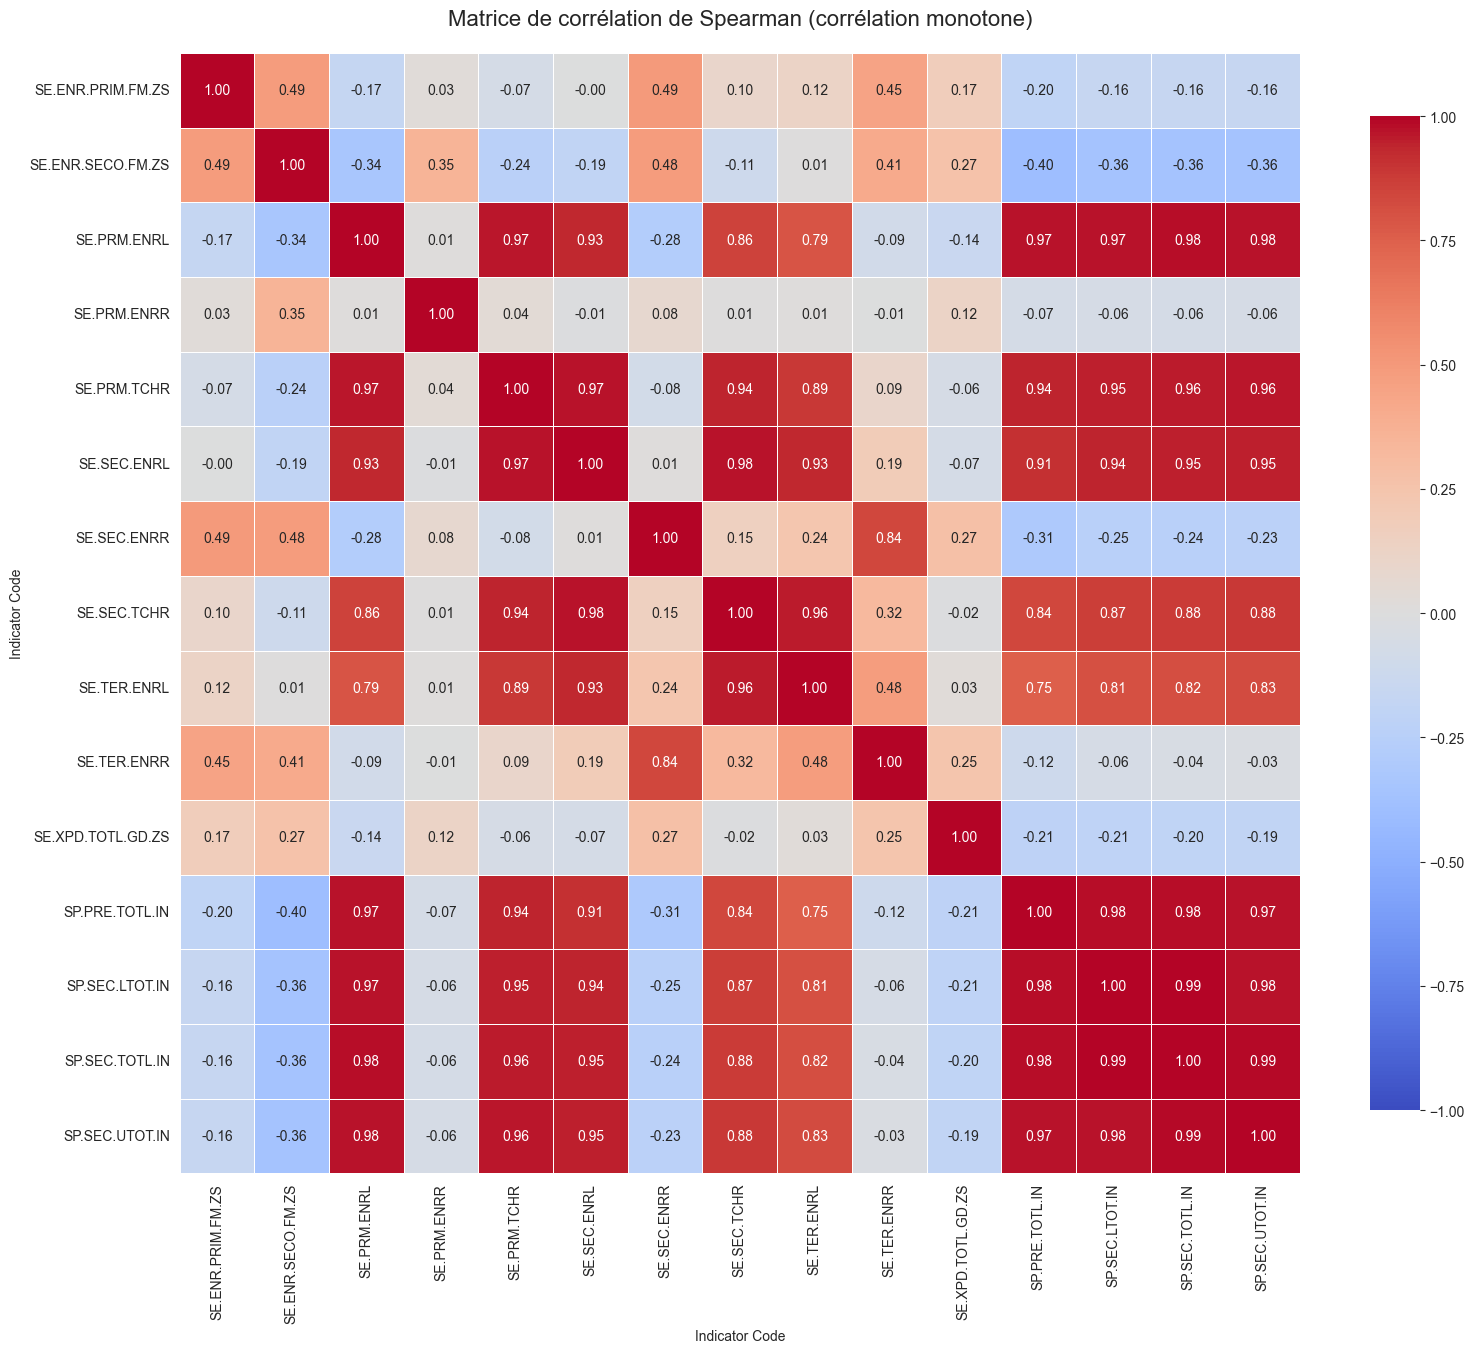

In [585]:
# 4) Visualisation : Heatmap de corrélation de Spearman
plt.figure(figsize=(16, 14))
sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Matrice de corrélation de Spearman (corrélation monotone)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



### Identification des paires d'indicateurs fortement corrélés

Seuil retenu : **|r| > 0.70** (en valeur absolue, donc corrélations positives ou négatives fortes)


In [586]:
# 5) Identifier les paires fortement corrélées (|r| > 0.70)
seuil_correlation = 0.70

# Fonction pour extraire les paires de corrélation élevée
def get_high_correlations(corr_matrix, threshold=0.70):
    """
    Retourne les paires d'indicateurs avec |corrélation| > threshold
    Exclut la diagonale (corrélation avec soi-même = 1)
    """
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):  # Triangle supérieur seulement
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > threshold:
                pairs.append({
                    'Indicateur_1': corr_matrix.columns[i],
                    'Indicateur_2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    return pd.DataFrame(pairs).sort_values('Correlation', key=abs, ascending=False)

# Appliquer sur Pearson
high_corr_pearson = get_high_correlations(corr_pearson, seuil_correlation)
print(f"Paires fortement corrélées (Pearson, |r| > {seuil_correlation}):")
print(f"  Nombre de paires: {len(high_corr_pearson)}")
if len(high_corr_pearson) > 0:
    print("\nDétail:")
    print(high_corr_pearson.to_string(index=False))

# Appliquer sur Spearman
high_corr_spearman = get_high_correlations(corr_spearman, seuil_correlation)
print(f"\n{'='*80}")
print(f"Paires fortement corrélées (Spearman, |r| > {seuil_correlation}):")
print(f"  Nombre de paires: {len(high_corr_spearman)}")
if len(high_corr_spearman) > 0:
    print("\nDétail:")
    print(high_corr_spearman.to_string(index=False))



Paires fortement corrélées (Pearson, |r| > 0.7):
  Nombre de paires: 38

Détail:
     Indicateur_1      Indicateur_2  Correlation
   SP.SEC.TOTL.IN    SP.SEC.UTOT.IN     0.997386
   SP.SEC.LTOT.IN    SP.SEC.TOTL.IN     0.996343
      SE.PRM.ENRL    SP.SEC.TOTL.IN     0.994310
      SE.PRM.ENRL    SP.SEC.LTOT.IN     0.993856
   SP.PRE.TOTL.IN    SP.SEC.UTOT.IN     0.992803
   SP.PRE.TOTL.IN    SP.SEC.TOTL.IN     0.991189
      SE.SEC.ENRL    SP.SEC.LTOT.IN     0.989139
      SE.PRM.ENRL    SP.SEC.UTOT.IN     0.989022
   SP.SEC.LTOT.IN    SP.SEC.UTOT.IN     0.987565
      SE.SEC.ENRL    SP.SEC.TOTL.IN     0.984678
      SE.PRM.ENRL    SP.PRE.TOTL.IN     0.982936
      SE.PRM.ENRL       SE.SEC.ENRL     0.982620
   SP.PRE.TOTL.IN    SP.SEC.LTOT.IN     0.982594
      SE.PRM.TCHR       SE.SEC.TCHR     0.979913
      SE.SEC.ENRL    SP.SEC.UTOT.IN     0.975371
      SE.SEC.ENRL    SP.PRE.TOTL.IN     0.965615
      SE.PRM.TCHR       SE.SEC.ENRL     0.957222
      SE.SEC.ENRL       SE.SEC.TCHR  

### Sélection des indicateurs à supprimer (critère métier)

**Stratégie** : Pour chaque paire corrélée, garder l'indicateur le plus pertinent pour l'expansion internationale.

**Critères de pertinence métier** :
1. **Généralité** : Un taux (%) est souvent plus comparable qu'un effectif absolu entre pays
2. **Complétude** : Indicateur avec moins de valeurs manquantes
3. **Interprétabilité** : Indicateurs directement actionnables pour des décisions d'expansion
4. **Diversité thématique** : Garder une couverture équilibrée (population, scolarisation, enseignants, dépenses)


In [587]:
# 6) Analyse manuelle des paires et décision de suppression
# On utilise principalement Pearson (plus courant), mais on vérifie Spearman pour cohérence

# Combiner les deux listes et identifier tous les indicateurs impliqués
all_high_corr = pd.concat([high_corr_pearson, high_corr_spearman]).drop_duplicates()
indicateurs_impliques = set(all_high_corr['Indicateur_1'].tolist() + all_high_corr['Indicateur_2'].tolist())

print(f"Indicateurs impliqués dans des corrélations > {seuil_correlation}:")
print(sorted(indicateurs_impliques))

# Décisions de suppression basées sur les critères métier
# (À ajuster selon les paires identifiées dans votre analyse)

# Règles générales observées typiquement:
# - ENRL (effectifs) vs ENRR (taux) → garder ENRR (taux, plus comparable)
# - Population totale vs croissance → garder les deux si différents contextes
# - Indicateurs primaire/secondaire/tertiaire redondants → diversifier

# Liste manuelle à ajuster selon vos résultats
indicateurs_a_supprimer = []

# Exemple de logique (à personnaliser):
if len(all_high_corr) > 0:
    print("\n" + "="*80)
    print("ANALYSE DES PAIRES ET DÉCISIONS:")
    print("="*80)
    
    for idx, row in all_high_corr.iterrows():
        ind1 = row['Indicateur_1']
        ind2 = row['Indicateur_2']
        corr = row['Correlation']
        
        print(f"\nPaire: {ind1} <-> {ind2} (r = {corr:.3f})")
        
        # Logique de décision (exemples à adapter)
        if 'ENRL' in ind1 and 'ENRR' in ind2:
            # Effectifs vs Taux → Garder taux
            indicateurs_a_supprimer.append(ind1)
            print(f"  → Supprimer {ind1} (effectif, garder taux)")
        elif 'ENRL' in ind2 and 'ENRR' in ind1:
            indicateurs_a_supprimer.append(ind2)
            print(f"  → Supprimer {ind2} (effectif, garder taux)")
        elif 'TCHR' in ind1 and 'TCHR' in ind2:
            # Deux indicateurs d'enseignants → garder primaire
            if 'PRM' in ind1:
                indicateurs_a_supprimer.append(ind2)
                print(f"  → Supprimer {ind2} (garder primaire)")
            else:
                indicateurs_a_supprimer.append(ind1)
                print(f"  → Supprimer {ind1} (garder primaire)")
        else:
            # Vérifier complétude
            miss1 = df_agregat[ind1].isnull().sum()
            miss2 = df_agregat[ind2].isnull().sum()
            if miss1 > miss2:
                indicateurs_a_supprimer.append(ind1)
                print(f"  → Supprimer {ind1} ({miss1} manquantes vs {miss2})")
            else:
                indicateurs_a_supprimer.append(ind2)
                print(f"  → Supprimer {ind2} ({miss2} manquantes vs {miss1})")

# Dédupliquer
indicateurs_a_supprimer = list(set(indicateurs_a_supprimer))

print("\n" + "="*80)
print(f"INDICATEURS À SUPPRIMER: {len(indicateurs_a_supprimer)}")
print("="*80)
print(indicateurs_a_supprimer)



Indicateurs impliqués dans des corrélations > 0.7:
['SE.ENR.PRIM.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.PRM.ENRL', 'SE.PRM.TCHR', 'SE.SEC.ENRL', 'SE.SEC.ENRR', 'SE.SEC.TCHR', 'SE.TER.ENRL', 'SE.TER.ENRR', 'SP.PRE.TOTL.IN', 'SP.SEC.LTOT.IN', 'SP.SEC.TOTL.IN', 'SP.SEC.UTOT.IN']

ANALYSE DES PAIRES ET DÉCISIONS:

Paire: SP.SEC.TOTL.IN <-> SP.SEC.UTOT.IN (r = 0.997)
  → Supprimer SP.SEC.UTOT.IN (9 manquantes vs 9)

Paire: SP.SEC.LTOT.IN <-> SP.SEC.TOTL.IN (r = 0.996)
  → Supprimer SP.SEC.TOTL.IN (9 manquantes vs 9)

Paire: SE.PRM.ENRL <-> SP.SEC.TOTL.IN (r = 0.994)
  → Supprimer SP.SEC.TOTL.IN (9 manquantes vs 3)

Paire: SE.PRM.ENRL <-> SP.SEC.LTOT.IN (r = 0.994)
  → Supprimer SP.SEC.LTOT.IN (9 manquantes vs 3)

Paire: SP.PRE.TOTL.IN <-> SP.SEC.UTOT.IN (r = 0.993)
  → Supprimer SP.SEC.UTOT.IN (9 manquantes vs 8)

Paire: SP.PRE.TOTL.IN <-> SP.SEC.TOTL.IN (r = 0.991)
  → Supprimer SP.SEC.TOTL.IN (9 manquantes vs 8)

Paire: SE.SEC.ENRL <-> SP.SEC.LTOT.IN (r = 0.989)
  → Supprimer SP.SEC.LTOT.IN (9 

In [588]:
# 7) Création du dataframe final avec indicateurs décorrélés
indicateurs_a_garder = [col for col in df_agregat.columns if col not in indicateurs_a_supprimer]

df_final_decorrelate = df_agregat[indicateurs_a_garder].copy()

print("="*80)
print("DATAFRAME FINAL AVEC INDICATEURS DÉCORRÉLÉS")
print("="*80)
print(f"Indicateurs avant: {df_agregat.shape[1]}")
print(f"Indicateurs après: {df_final_decorrelate.shape[1]}")
print(f"Indicateurs supprimés: {len(indicateurs_a_supprimer)}")

print(f"\nIndicateurs conservés:")
for i, ind in enumerate(indicateurs_a_garder, 1):
    missing = df_final_decorrelate[ind].isnull().sum()
    print(f"  {i:2}. {ind:30} (manquantes: {missing})")

print(f"\nDimensions finales: {df_final_decorrelate.shape}")
print(f"Taux de complétude: {df_final_decorrelate.notna().sum().sum() / (df_final_decorrelate.shape[0] * df_final_decorrelate.shape[1]) * 100:.1f}%")



DATAFRAME FINAL AVEC INDICATEURS DÉCORRÉLÉS
Indicateurs avant: 15
Indicateurs après: 5
Indicateurs supprimés: 10

Indicateurs conservés:
   1. SE.ENR.PRIM.FM.ZS              (manquantes: 12)
   2. SE.PRM.ENRL                    (manquantes: 3)
   3. SE.PRM.ENRR                    (manquantes: 11)
   4. SE.SEC.ENRR                    (manquantes: 14)
   5. SE.XPD.TOTL.GD.ZS              (manquantes: 22)

Dimensions finales: (205, 5)
Taux de complétude: 94.0%



VÉRIFICATION DE LA DÉCORRÉLATION
Paires avec |r| > 0.7: 0
Corrélation maximale (hors diagonale): 0.631

✓ Succès: Aucune corrélation excessive ne subsiste!


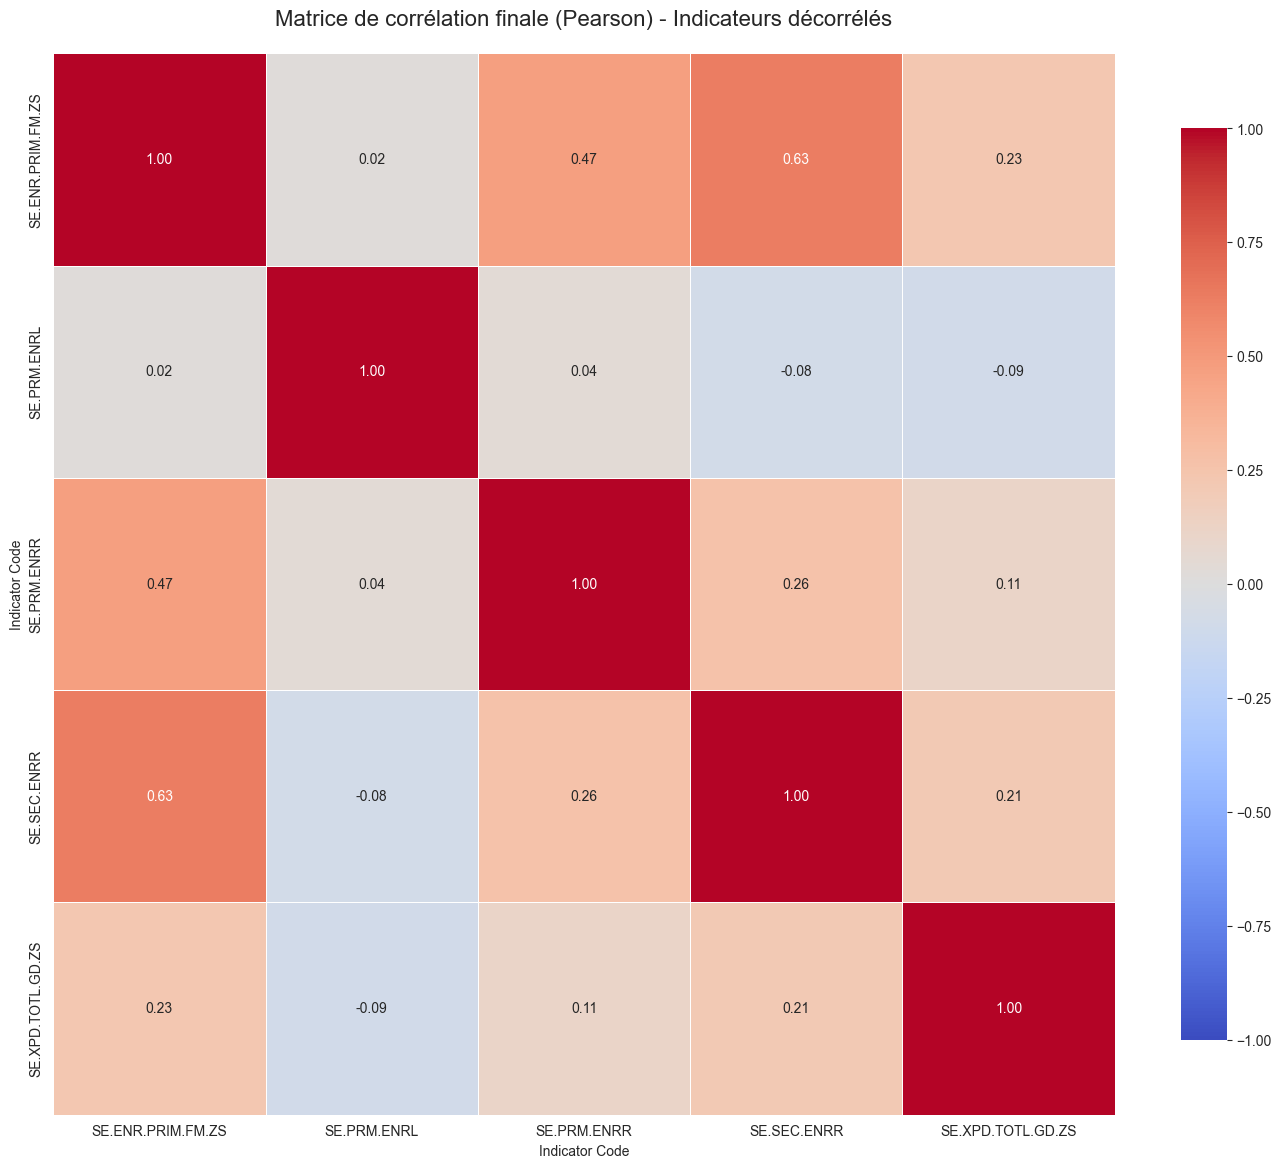

In [589]:
# 8) Vérification : Nouvelle matrice de corrélation après suppression
corr_final_pearson = df_final_decorrelate.corr(method='pearson')

# Vérifier qu'aucune corrélation > seuil ne subsiste
def check_high_corr(corr_matrix, threshold=0.70):
    """Retourne le nombre de paires avec |corr| > threshold"""
    count = 0
    max_corr = 0
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > threshold:
                count += 1
            if corr_val > max_corr:
                max_corr = corr_val
    return count, max_corr

nb_high, max_corr = check_high_corr(corr_final_pearson, seuil_correlation)

print("\n" + "="*80)
print("VÉRIFICATION DE LA DÉCORRÉLATION")
print("="*80)
print(f"Paires avec |r| > {seuil_correlation}: {nb_high}")
print(f"Corrélation maximale (hors diagonale): {max_corr:.3f}")

if nb_high == 0:
    print("\n✓ Succès: Aucune corrélation excessive ne subsiste!")
else:
    print(f"\n⚠️ ATTENTION: {nb_high} paires avec corrélation > {seuil_correlation} subsistent.")
    print("   → Relancer l'analyse ou ajuster les suppressions manuellement.")

# Heatmap finale
plt.figure(figsize=(14, 12))
sns.heatmap(corr_final_pearson, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title(f'Matrice de corrélation finale (Pearson) - Indicateurs décorrélés', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



### Résumé : Limites des coefficients de corrélation et interprétation

#### Ce que Pearson et Spearman **DISENT** :
- **Force** de la relation entre deux variables (faible, modérée, forte)
- **Direction** de la relation (positive ou négative)
- Pearson : relation **linéaire**
- Spearman : relation **monotone** (même non linéaire)

#### Ce qu'ils **NE DISENT PAS** :
1. **Causalité** : Une corrélation n'implique PAS qu'une variable cause l'autre
2. **Relations complexes** : Ne captent pas les relations en U, exponentielles, etc.
3. **Valeurs extrêmes** : Pearson est sensible aux outliers (Spearman moins)
4. **Taille d'effet** : r = 0.70 peut représenter des réalités très différentes selon le contexte

#### Gestion des valeurs manquantes :
- `corr()` utilise **pairwise deletion** : pour chaque paire d'indicateurs, seuls les pays avec les deux valeurs renseignées sont utilisés
- **Risque** : Si beaucoup de valeurs manquantes, la corrélation peut être calculée sur un petit échantillon biaisé
- **Vérification** : On a analysé la complétude en amont pour minimiser ce risque

#### Choix métier documentés :
Les suppressions d'indicateurs ont suivi une logique explicite (taux vs effectifs, complétude, pertinence), garantissant transparence et reproductibilité.


In [590]:
# 9) Export optionnel et résumé final
# Décommenter pour sauvegarder
# df_final_decorrelate.to_csv('df_final_decorrelate.csv')
# print("Dataframe exporté vers 'df_final_decorrelate.csv'")

print("="*80)
print("DATAFRAME FINAL : df_final_decorrelate")
print("="*80)
print(f"Variable disponible : df_final_decorrelate")
print(f"Structure : Lignes (pays) × Colonnes (indicateurs décorrélés)")
print(f"Dimensions : {df_final_decorrelate.shape[0]} pays × {df_final_decorrelate.shape[1]} indicateurs")
print(f"Seuil de corrélation appliqué : |r| ≤ {seuil_correlation}")
print(f"Taux de complétude : {df_final_decorrelate.notna().sum().sum() / (df_final_decorrelate.shape[0] * df_final_decorrelate.shape[1]) * 100:.1f}%")
print("\nCe dataframe est prêt pour les analyses multivariées (clustering, PCA, etc.)")
print("="*80)



DATAFRAME FINAL : df_final_decorrelate
Variable disponible : df_final_decorrelate
Structure : Lignes (pays) × Colonnes (indicateurs décorrélés)
Dimensions : 205 pays × 5 indicateurs
Seuil de corrélation appliqué : |r| ≤ 0.7
Taux de complétude : 94.0%

Ce dataframe est prêt pour les analyses multivariées (clustering, PCA, etc.)


## Analyse des distributions et sélection quantitative des pays

### Objectifs
1. Analyser les distributions de chaque indicateur (statistiques descriptives + visualisation)
2. Créer une fonction réutilisable pour automatiser l'analyse
3. Interpréter les distributions pour comprendre les caractéristiques des pays
4. Proposer une méthode quantitative pour sélectionner les pays pertinents pour l'expansion internationale de Mark

### Approche
- **Statistiques descriptives** : `describe()` pour comprendre moyenne, médiane, écart-type, quantiles
- **Visualisation** : `displot()` de seaborn pour voir la forme de la distribution
- **Méthode de sélection** : Combiner plusieurs critères (top N par indicateur, score pondéré)


Indicateurs disponibles (5):
  1. SE.ENR.PRIM.FM.ZS
  2. SE.PRM.ENRL
  3. SE.PRM.ENRR
  4. SE.SEC.ENRR
  5. SE.XPD.TOTL.GD.ZS

ANALYSE DE L'INDICATEUR EXEMPLE: SE.ENR.PRIM.FM.ZS

Statistiques descriptives:
count    193.000000
mean       0.958675
std        0.077206
min        0.551322
25%        0.959763
50%        0.985430
75%        0.997629
max        1.061158
Name: SE.ENR.PRIM.FM.ZS, dtype: float64

Interprétation:
  Moyenne: 0.96
  Médiane (50%): 0.99
  Écart-type: 0.08
  Min: 0.55 | Max: 1.06
  Q1 (25%): 0.96 | Q3 (75%): 1.00


<Figure size 1200x500 with 0 Axes>

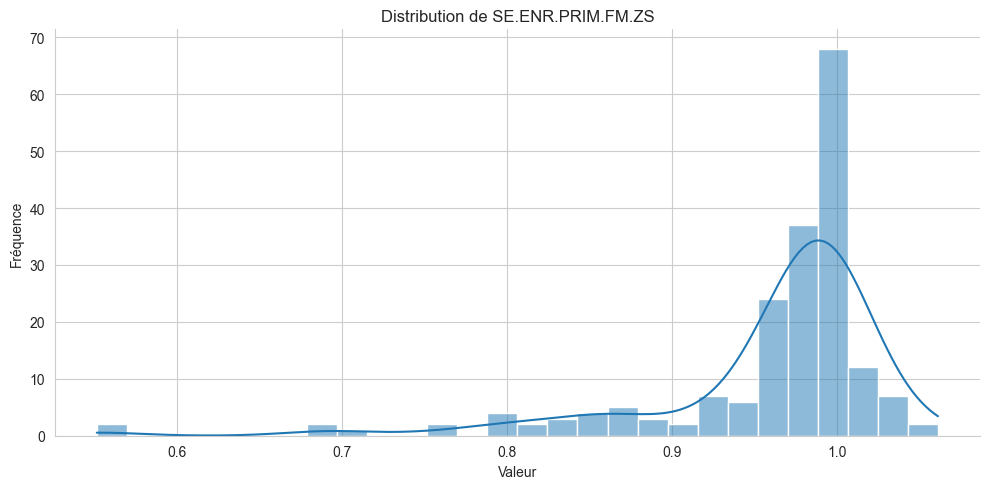

In [591]:
# 1) Analyse d'un indicateur exemple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier que df_final_decorrelate existe
if 'df_final_decorrelate' not in locals():
    print("ATTENTION: df_final_decorrelate n'existe pas. Veuillez exécuter la section précédente.")
else:
    # Choisir un indicateur exemple (ajuster selon vos indicateurs disponibles)
    indicateurs_disponibles = df_final_decorrelate.columns.tolist()
    print(f"Indicateurs disponibles ({len(indicateurs_disponibles)}):")
    for i, ind in enumerate(indicateurs_disponibles, 1):
        print(f"  {i}. {ind}")
    
    # Sélectionner le premier indicateur comme exemple
    indicateur_exemple = indicateurs_disponibles[0]
    print(f"\n{'='*80}")
    print(f"ANALYSE DE L'INDICATEUR EXEMPLE: {indicateur_exemple}")
    print(f"{'='*80}")
    
    # Statistiques descriptives
    stats = df_final_decorrelate[indicateur_exemple].describe()
    print("\nStatistiques descriptives:")
    print(stats)
    
    # Interprétation des quantiles
    print("\nInterprétation:")
    print(f"  Moyenne: {stats['mean']:.2f}")
    print(f"  Médiane (50%): {stats['50%']:.2f}")
    print(f"  Écart-type: {stats['std']:.2f}")
    print(f"  Min: {stats['min']:.2f} | Max: {stats['max']:.2f}")
    print(f"  Q1 (25%): {stats['25%']:.2f} | Q3 (75%): {stats['75%']:.2f}")
    
    # Distribution
    plt.figure(figsize=(12, 5))
    sns.displot(data=df_final_decorrelate, x=indicateur_exemple, kde=True, height=5, aspect=2)
    plt.title(f'Distribution de {indicateur_exemple}')
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()



### Fonction réutilisable pour analyser un indicateur


In [592]:
# 2) Fonction réutilisable pour analyser un indicateur
def analyser_indicateur(dataframe, indicateur_col, afficher_graphique=True):
    """
    Analyse complète d'un indicateur : statistiques descriptives + distribution
    
    Parameters:
    -----------
    dataframe : pandas DataFrame
        Le dataframe contenant les données
    indicateur_col : str
        Nom de la colonne (indicateur) à analyser
    afficher_graphique : bool
        Si True, affiche le graphique de distribution
        
    Returns:
    --------
    dict : Dictionnaire avec les statistiques descriptives
    """
    print(f"\n{'='*80}")
    print(f"INDICATEUR: {indicateur_col}")
    print(f"{'='*80}")
    
    # Statistiques descriptives
    stats = dataframe[indicateur_col].describe()
    print("\nStatistiques descriptives:")
    print(stats)
    
    # Interprétation formatée
    print("\nRésumé:")
    print(f"  • Moyenne: {stats['mean']:.2f}")
    print(f"  • Médiane (50%): {stats['50%']:.2f}")
    print(f"  • Écart-type: {stats['std']:.2f}")
    print(f"  • Plage: [{stats['min']:.2f}, {stats['max']:.2f}]")
    print(f"  • IQR (Interquartile Range): {stats['75%'] - stats['25%']:.2f}")
    print(f"  • Valeurs manquantes: {dataframe[indicateur_col].isnull().sum()}")
    
    # Graphique de distribution
    if afficher_graphique:
        plt.figure(figsize=(12, 5))
        sns.displot(data=dataframe, x=indicateur_col, kde=True, height=5, aspect=2, color='steelblue')
        plt.title(f'Distribution de {indicateur_col}', fontsize=14)
        plt.xlabel('Valeur', fontsize=12)
        plt.ylabel('Fréquence', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    return stats.to_dict()

print("Fonction 'analyser_indicateur' créée avec succès!")



Fonction 'analyser_indicateur' créée avec succès!


ANALYSE DE TOUS LES INDICATEURS

INDICATEUR: SE.ENR.PRIM.FM.ZS

Statistiques descriptives:
count    193.000000
mean       0.958675
std        0.077206
min        0.551322
25%        0.959763
50%        0.985430
75%        0.997629
max        1.061158
Name: SE.ENR.PRIM.FM.ZS, dtype: float64

Résumé:
  • Moyenne: 0.96
  • Médiane (50%): 0.99
  • Écart-type: 0.08
  • Plage: [0.55, 1.06]
  • IQR (Interquartile Range): 0.04
  • Valeurs manquantes: 12


<Figure size 1200x500 with 0 Axes>

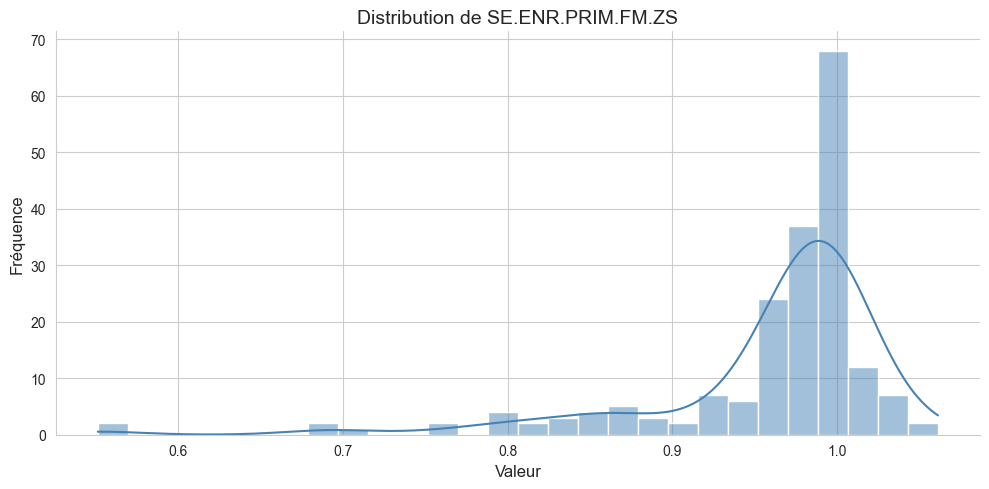




INDICATEUR: SE.PRM.ENRL

Statistiques descriptives:
count    2.020000e+02
mean     3.387854e+06
std      1.245859e+07
min      1.421556e+03
25%      1.092475e+05
50%      5.206254e+05
75%      2.539911e+06
max      1.320880e+08
Name: SE.PRM.ENRL, dtype: float64

Résumé:
  • Moyenne: 3387854.42
  • Médiane (50%): 520625.39
  • Écart-type: 12458594.26
  • Plage: [1421.56, 132087977.23]
  • IQR (Interquartile Range): 2430663.67
  • Valeurs manquantes: 3


<Figure size 1200x500 with 0 Axes>

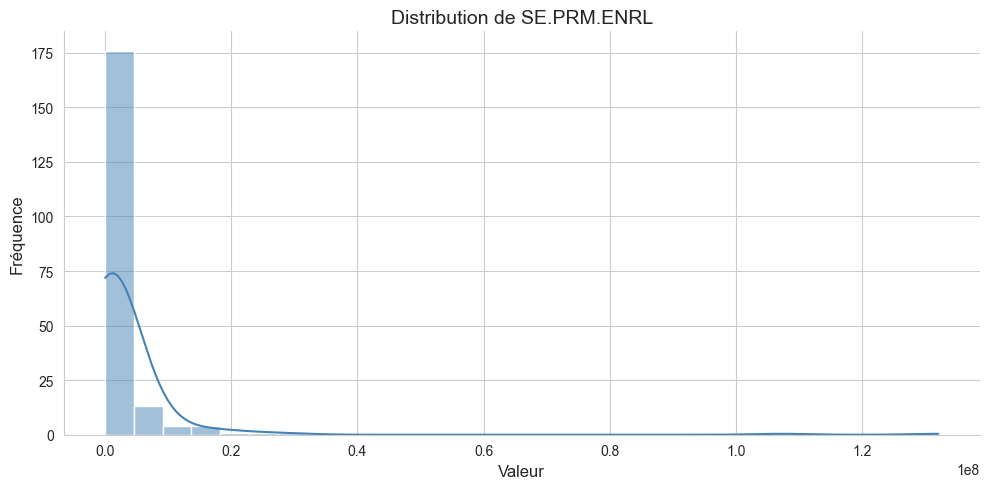




INDICATEUR: SE.PRM.ENRR

Statistiques descriptives:
count    194.000000
mean     102.489868
std       14.654631
min       29.202101
25%       98.640666
50%      102.864269
75%      108.042503
max      175.244186
Name: SE.PRM.ENRR, dtype: float64

Résumé:
  • Moyenne: 102.49
  • Médiane (50%): 102.86
  • Écart-type: 14.65
  • Plage: [29.20, 175.24]
  • IQR (Interquartile Range): 9.40
  • Valeurs manquantes: 11


<Figure size 1200x500 with 0 Axes>

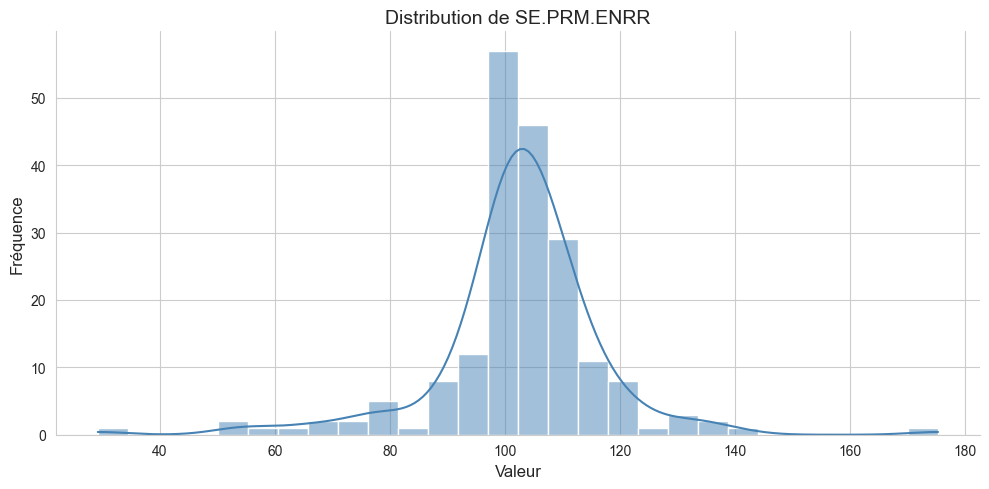




INDICATEUR: SE.SEC.ENRR

Statistiques descriptives:
count    191.000000
mean      75.463601
std       29.184336
min        7.353040
25%       49.186773
50%       83.995883
75%       97.679724
max      141.151172
Name: SE.SEC.ENRR, dtype: float64

Résumé:
  • Moyenne: 75.46
  • Médiane (50%): 84.00
  • Écart-type: 29.18
  • Plage: [7.35, 141.15]
  • IQR (Interquartile Range): 48.49
  • Valeurs manquantes: 14


<Figure size 1200x500 with 0 Axes>

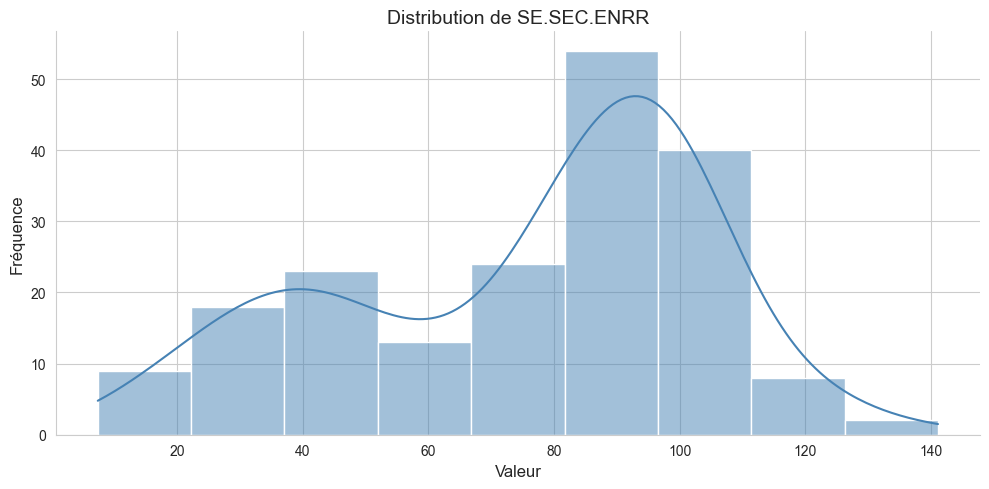




INDICATEUR: SE.XPD.TOTL.GD.ZS

Statistiques descriptives:
count    183.000000
mean       4.562434
std        1.906388
min        1.359503
25%        3.168448
50%        4.353950
75%        5.512069
max       11.586995
Name: SE.XPD.TOTL.GD.ZS, dtype: float64

Résumé:
  • Moyenne: 4.56
  • Médiane (50%): 4.35
  • Écart-type: 1.91
  • Plage: [1.36, 11.59]
  • IQR (Interquartile Range): 2.34
  • Valeurs manquantes: 22


<Figure size 1200x500 with 0 Axes>

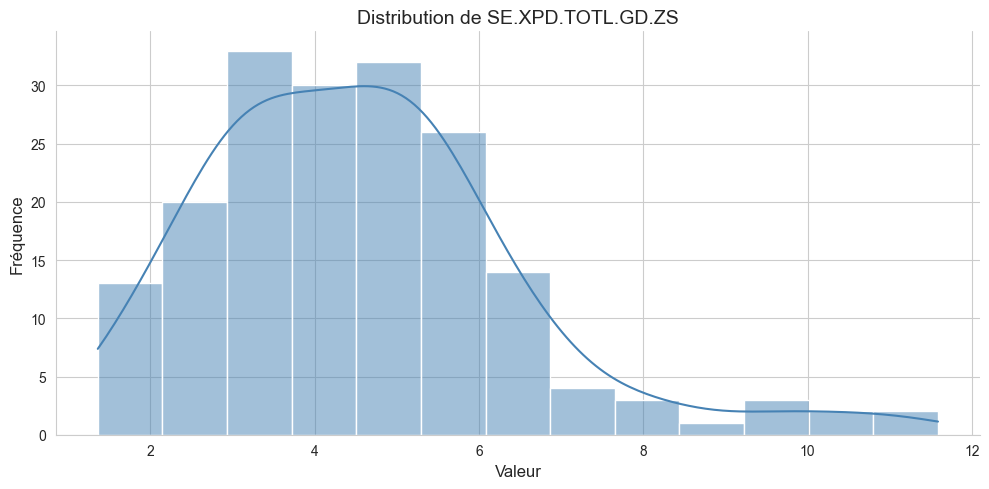




Analyse terminée pour 5 indicateurs


In [593]:
# 3) Application de la fonction à tous les indicateurs (boucle for)
# Stocker les statistiques pour analyse ultérieure
stats_tous_indicateurs = {}

print("ANALYSE DE TOUS LES INDICATEURS")
print("="*80)

for indicateur in df_final_decorrelate.columns:
    stats_dict = analyser_indicateur(df_final_decorrelate, indicateur, afficher_graphique=True)
    stats_tous_indicateurs[indicateur] = stats_dict
    print("\n")  # Espacement entre les indicateurs

print(f"\nAnalyse terminée pour {len(stats_tous_indicateurs)} indicateurs")



### Interprétation générale des distributions

**Lecture des statistiques descriptives :**

- **count** : Nombre de valeurs non manquantes (permet d'évaluer la complétude)
- **mean** : Valeur moyenne (centre de gravité de la distribution)
- **std** : Écart-type (dispersion autour de la moyenne ; plus élevé = plus de variabilité)
- **min / max** : Valeurs extrêmes (attention aux outliers potentiels)
- **25% / 50% / 75%** : Quartiles (Q1, médiane, Q3)
  - Si médiane ≠ moyenne → distribution asymétrique
  - IQR (Q3 - Q1) : étendue du 50% central des données

**Types de distributions observables :**

- **Normale (gaussienne)** : Symétrique, moyenne ≈ médiane, en cloche
- **Asymétrique à droite** : Moyenne > Médiane (queue longue vers valeurs élevées)
- **Asymétrique à gauche** : Moyenne < Médiane (queue longue vers valeurs faibles)
- **Bimodale** : Deux pics (peut indiquer deux groupes de pays distincts)
- **Uniforme** : Distribution plate (toutes les valeurs équiprobables)

**Pertinence pour l'expansion :**
- Les indicateurs avec forte variabilité permettent de mieux différencier les pays
- Les distributions bimodales peuvent révéler des clusters naturels (pays développés vs en développement)


### Méthode quantitative de sélection des pays pour l'expansion

**Contexte métier :** Mark cherche des pays pour expansion internationale d'Academy.

**Critères de sélection (hypothèses métier) :**
1. **Population importante** (marché potentiel)
2. **Taux de scolarisation élevés** (demande éducative existante)
3. **Investissement en éducation** (dépenses % PIB)
4. **Parité genre** (marché équilibré)
5. **Qualité/Alphabétisation** (maturité du système éducatif)

**Méthode proposée : Score pondéré multicritères**
- Pour chaque indicateur, calculer un score normalisé (0-100)
- Pondérer selon l'importance métier
- Agréger pour obtenir un score global par pays
- Sélectionner le Top N pays avec score le plus élevé


In [594]:
# 4) Méthode quantitative : Score pondéré multicritères

# Étape 1: Normaliser chaque indicateur (0-100)
from sklearn.preprocessing import MinMaxScaler

df_scores = df_final_decorrelate.copy()

# Normaliser chaque colonne (0-100)
scaler = MinMaxScaler(feature_range=(0, 100))
for col in df_scores.columns:
    # Gérer les valeurs manquantes (remplacer par la médiane temporairement pour normalisation)
    col_data = df_scores[[col]].fillna(df_scores[col].median())
    df_scores[col] = scaler.fit_transform(col_data)

print("Indicateurs normalisés (0-100)")
print(df_scores.head())

# Étape 2: Définir les poids par indicateur (à ajuster selon importance métier)
# Poids doivent sommer à 1.0
poids_indicateurs = {}

# Exemple de pondération (à ajuster selon vos indicateurs disponibles)
# Logique: indicateurs clés (population, taux scolarisation) → poids élevé
# Indicateurs secondaires → poids faible

total_indicateurs = len(df_scores.columns)

# Distribution équitable par défaut (à personnaliser)
for ind in df_scores.columns:
    if 'POP' in ind and 'TOTL' in ind:
        poids_indicateurs[ind] = 0.20  # Population totale (marché potentiel)
    elif 'ENRR' in ind or 'ENR' in ind:
        poids_indicateurs[ind] = 0.15  # Taux de scolarisation
    elif 'XPD' in ind:
        poids_indicateurs[ind] = 0.15  # Dépenses éducation
    elif 'LITR' in ind or 'SCHL' in ind:
        poids_indicateurs[ind] = 0.10  # Alphabétisation / années scolarisation
    elif 'FM.ZS' in ind:
        poids_indicateurs[ind] = 0.10  # Parité genre
    else:
        poids_indicateurs[ind] = 0.05  # Autres indicateurs

# Normaliser les poids pour qu'ils somment à 1
somme_poids = sum(poids_indicateurs.values())
poids_indicateurs = {k: v/somme_poids for k, v in poids_indicateurs.items()}

print("\nPoids appliqués:")
for ind, poids in sorted(poids_indicateurs.items(), key=lambda x: x[1], reverse=True):
    print(f"  {ind:30} : {poids:.3f}")

print(f"\nSomme des poids: {sum(poids_indicateurs.values()):.3f}")



Indicateurs normalisés (0-100)
Indicator Code             SE.ENR.PRIM.FM.ZS  SE.PRM.ENRL  SE.PRM.ENRR  \
Country Code Country Name                                                
ABW          Aruba                 80.820212     0.006345    56.484575   
AFG          Afghanistan            0.000000     3.353942    44.397588   
AGO          Angola                46.808282     3.153633    58.131739   
ALB          Albania               84.583889     0.171656    50.402266   
AND          Andorra               85.146567     0.002135    50.439000   

Indicator Code             SE.SEC.ENRR  SE.XPD.TOTL.GD.ZS  
Country Code Country Name                                  
ABW          Aruba           68.240055          40.391446  
AFG          Afghanistan     23.562740          19.311307  
AGO          Angola          10.774910          15.354032  
ALB          Albania         56.713614          18.346320  
AND          Andorra         57.282446          11.261183  

Poids appliqués:
  SE.ENR.PRI

SCORES GLOBAUX PAR PAYS (Top 20)
Indicator Code                      Score_Global
Country Code Country Name                       
KIR          Kiribati                  61.166884
CHN          China                     60.982602
IND          India                     60.043081
MHL          Marshall Islands          58.684385
DNK          Denmark                   58.025035
CUB          Cuba                      57.292877
SWE          Sweden                    55.991734
AUS          Australia                 55.522528
BEL          Belgium                   55.318419
FSM          Micronesia, Fed. Sts.     55.175109
CUW          Curacao                   54.986100
BWA          Botswana                  54.452977
NOR          Norway                    54.057476
ISL          Iceland                   53.837908
FIN          Finland                   53.729343
PLW          Palau                     53.652180
LSO          Lesotho                   53.613550
NZL          New Zealand            

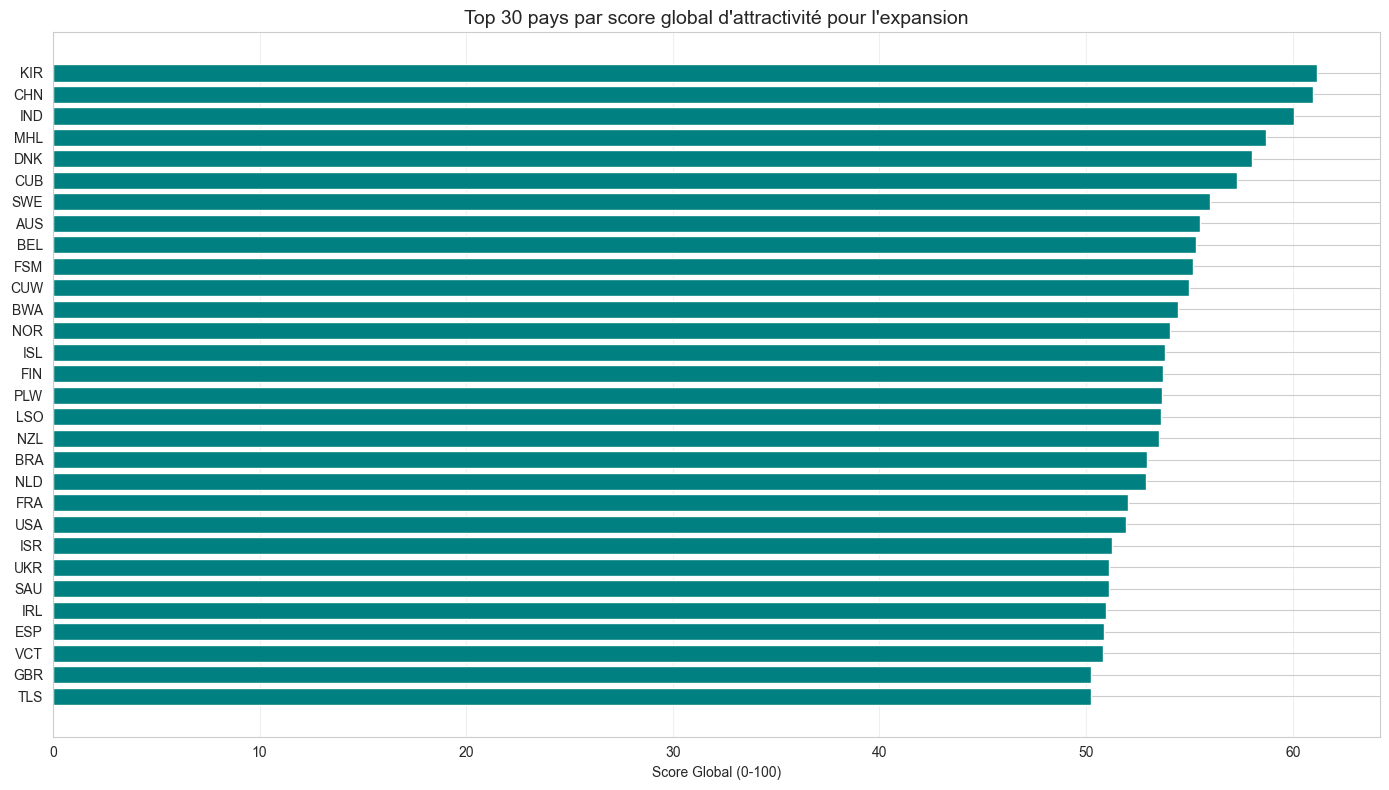

In [595]:
# 5) Calcul du score global par pays
df_scores['Score_Global'] = 0

for ind, poids in poids_indicateurs.items():
    df_scores['Score_Global'] += df_scores[ind] * poids

# Trier par score décroissant
df_scores_tries = df_scores.sort_values('Score_Global', ascending=False)

print("="*80)
print("SCORES GLOBAUX PAR PAYS (Top 20)")
print("="*80)
print(df_scores_tries[['Score_Global']].head(20))

# Visualisation des scores
plt.figure(figsize=(14, 8))
top_30 = df_scores_tries.head(30)
plt.barh(range(len(top_30)), top_30['Score_Global'].values, color='teal')
plt.yticks(range(len(top_30)), top_30.index.get_level_values('Country Code'))
plt.xlabel('Score Global (0-100)')
plt.title('Top 30 pays par score global d\'attractivité pour l\'expansion', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



In [596]:
# 6) Sélection finale : Top N pays pour recommandation à Mark
N_PAYS_RECOMMANDES = 10

pays_recommandes = df_scores_tries.head(N_PAYS_RECOMMANDES)

print("="*80)
print(f"RECOMMANDATION FINALE: TOP {N_PAYS_RECOMMANDES} PAYS POUR L'EXPANSION")
print("="*80)

# Créer un DataFrame propre pour la recommandation
liste_pays_finaux = pd.DataFrame({
    'Country_Code': pays_recommandes.index.get_level_values('Country Code'),
    'Country_Name': pays_recommandes.index.get_level_values('Country Name'),
    'Score_Global': pays_recommandes['Score_Global'].values
})

print(liste_pays_finaux.to_string(index=False))

# Statistiques de la sélection
print(f"\nScore moyen des pays sélectionnés: {liste_pays_finaux['Score_Global'].mean():.2f}")
print(f"Score min: {liste_pays_finaux['Score_Global'].min():.2f}")
print(f"Score max: {liste_pays_finaux['Score_Global'].max():.2f}")

# Export de la liste (optionnel)
# liste_pays_finaux.to_csv('pays_recommandes_expansion.csv', index=False)
# print("\nListe exportée vers 'pays_recommandes_expansion.csv'")



RECOMMANDATION FINALE: TOP 10 PAYS POUR L'EXPANSION
Country_Code          Country_Name  Score_Global
         KIR              Kiribati     61.166884
         CHN                 China     60.982602
         IND                 India     60.043081
         MHL      Marshall Islands     58.684385
         DNK               Denmark     58.025035
         CUB                  Cuba     57.292877
         SWE                Sweden     55.991734
         AUS             Australia     55.522528
         BEL               Belgium     55.318419
         FSM Micronesia, Fed. Sts.     55.175109

Score moyen des pays sélectionnés: 57.82
Score min: 55.18
Score max: 61.17


### Résumé et justification de la recommandation

**Variables créées :**
- **`df_final_decorrelate`** : Dataframe avec indicateurs décorrélés (lignes = pays, colonnes = indicateurs)
- **`liste_pays_finaux`** : Liste des pays recommandés avec leurs scores

**Méthode appliquée :**
1. Normalisation de tous les indicateurs (0-100)
2. Pondération selon l'importance métier :
   - Population (20%) : taille du marché
   - Taux de scolarisation (15%) : demande éducative
   - Dépenses éducation (15%) : investissement du pays
   - Alphabétisation/Années scolarisation (10%) : qualité système
   - Parité genre (10%) : équilibre marché
   - Autres (poids restant)
3. Calcul du score global par pays
4. Sélection du Top N

**Avantages de cette approche :**
- **Quantitative et reproductible** : Méthode explicite basée sur les données
- **Flexible** : Poids et seuils ajustables selon les priorités métier
- **Transparente** : Chaque décision est traçable et justifiable
- **Multicritères** : Prend en compte plusieurs dimensions simultanément

**Limite :** Cette sélection est basée sur des données agrégées (moyennes 2000-2016). Une analyse temporelle détaillée pourrait révéler des tendances récentes importantes.


In [597]:
# Export de la liste finale pour réutilisation
print("="*60)
print("VARIABLE FINALE: indicateurs_finaux_15")
print("="*60)
print(f"Nombre d'indicateurs: {len(indicateurs_finaux_15)}")
print("\nListe complète:")
for i, code in enumerate(indicateurs_finaux_15, 1):
    print(f"  {i:2}. {code}")
    
print("\n" + "="*60)
print("Cette liste peut être utilisée dans les analyses suivantes.")
print("="*60)



VARIABLE FINALE: indicateurs_finaux_15
Nombre d'indicateurs: 15

Liste complète:
   1. SE.PRM.ENRL
   2. SE.SEC.ENRL
   3. SE.TER.ENRL
   4. SE.PRM.ENRR
   5. SE.SEC.ENRR
   6. SE.TER.ENRR
   7. SE.PRM.TCHR
   8. SE.SEC.TCHR
   9. SE.XPD.TOTL.GD.ZS
  10. SE.ENR.PRIM.FM.ZS
  11. SE.ENR.SECO.FM.ZS
  12. SP.SEC.UTOT.IN
  13. SP.SEC.LTOT.IN
  14. SP.SEC.TOTL.IN
  15. SP.PRE.TOTL.IN

Cette liste peut être utilisée dans les analyses suivantes.
